In [3]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
import re

from os import listdir
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data


files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
indexesFiles=listdir("/home/andrea/Desktop/stocknet-dataset-master/price/raw")

tickers=list()
for file in indexesFiles:
    file=re.sub('\.csv$', '', file)
    
    tickers.append(file)
tickers.sort()

prices=list()
sentiment=list()
for file in tickers:
    
    price =  pd.read_csv("/home/andrea/Desktop/stocknet-dataset-master/price/raw/"+file+".csv")
    
    print(price)
    price=price.drop(['Date'],axis=1)
    prices.append(price)

            Date        Open        High         Low       Close   Adj Close  \
0     2012-09-04   95.108574   96.448570   94.928574   96.424286   87.121140   
1     2012-09-05   96.510002   96.621429   95.657143   95.747147   86.509338   
2     2012-09-06   96.167145   96.898575   95.828575   96.610001   87.288956   
3     2012-09-07   96.864288   97.497147   96.538574   97.205711   87.827171   
4     2012-09-10   97.207146   97.612854   94.585716   94.677139   85.542564   
5     2012-09-11   95.015717   95.728569   93.785713   94.370003   85.265068   
6     2012-09-12   95.264282   95.699997   93.714287   95.684288   86.452538   
7     2012-09-13   96.767143   97.928574   96.395714   97.568573   88.155037   
8     2012-09-14   98.565712   99.568573   98.269997   98.754288   89.226341   
9     2012-09-17   99.907143   99.971428   99.230003   99.968575   90.323479   
10    2012-09-18   99.982857  100.332855   99.488571  100.272858   90.598404   
11    2012-09-19  100.037140  100.570000

            Date       Open       High        Low      Close  Adj Close  \
0     2012-09-04  29.530001  30.070000  29.530001  29.700001  28.989849   
1     2012-09-05  29.719999  29.920000  29.600000  29.770000  29.058178   
2     2012-09-06  29.900000  31.150000  29.879999  31.120001  30.375896   
3     2012-09-07  31.400000  32.450001  31.400000  32.070000  31.303183   
4     2012-09-10  32.130001  32.599998  31.770000  31.830000  31.068914   
5     2012-09-11  31.889999  34.490002  31.320000  32.660000  31.879070   
6     2012-09-12  33.009998  33.580002  32.820000  33.049999  32.259747   
7     2012-09-13  32.970001  34.500000  32.639999  34.450001  33.626263   
8     2012-09-14  35.040001  35.250000  34.480000  34.790001  33.958160   
9     2012-09-17  34.470001  34.720001  33.849998  34.060001  33.245602   
10    2012-09-18  33.740002  34.000000  33.320000  33.939999  33.128468   
11    2012-09-19  34.029999  34.540001  33.880001  34.180000  33.362736   
12    2012-09-20  33.5600

            Date       Open       High        Low      Close  Adj Close  \
0     2012-09-04  20.629999  20.690001  20.480000  20.510000  17.401751   
1     2012-09-05  20.549999  20.770000  20.510000  20.650000  17.520535   
2     2012-09-06  20.870001  21.320000  20.850000  21.309999  18.080509   
3     2012-09-07  21.320000  21.590000  21.299999  21.590000  18.318081   
4     2012-09-10  21.480000  21.650000  21.430000  21.480000  18.224752   
5     2012-09-11  21.490000  21.690001  21.400000  21.590000  18.318081   
6     2012-09-12  21.670000  21.930000  21.660000  21.889999  18.572618   
7     2012-09-13  21.770000  22.240000  21.750000  22.020000  18.682915   
8     2012-09-14  22.200001  22.370001  21.980000  22.110001  18.759274   
9     2012-09-17  21.930000  22.049999  21.900000  22.049999  18.708366   
10    2012-09-18  21.990000  22.240000  21.959999  22.240000  18.869574   
11    2012-09-19  22.299999  22.490000  22.250000  22.430000  19.030779   
12    2012-09-20  22.1900

            Date       Open       High        Low      Close  Adj Close  \
0     2012-09-04  30.450001  30.660000  30.150000  30.389999  26.525377   
1     2012-09-05  30.219999  30.530001  30.209999  30.389999  26.525377   
2     2012-09-06  30.500000  31.360001  30.459999  31.350000  27.363289   
3     2012-09-07  31.040001  31.070000  30.730000  30.950001  27.014162   
4     2012-09-10  30.830000  30.900000  30.510000  30.719999  26.813404   
5     2012-09-11  30.690001  30.910000  30.610001  30.790001  26.874504   
6     2012-09-12  30.940001  31.180000  30.730000  30.780001  26.865774   
7     2012-09-13  30.889999  31.180000  30.400000  30.940001  27.005426   
8     2012-09-14  31.010000  31.250000  30.809999  31.209999  27.241091   
9     2012-09-17  31.190001  31.260000  31.040001  31.209999  27.241091   
10    2012-09-18  31.100000  31.209999  31.030001  31.180000  27.214912   
11    2012-09-19  31.090000  31.190001  31.040001  31.049999  27.101442   
12    2012-09-20  30.9500

            Date       Open       High        Low      Close  Adj Close  \
0     2012-09-04  45.299999  45.599998  45.209999  45.470001  36.115128   
1     2012-09-05  45.590000  45.619999  45.340000  45.369999  36.035698   
2     2012-09-06  45.660000  46.070000  45.549999  46.070000  36.591686   
3     2012-09-07  46.099998  46.150002  45.830002  45.910000  36.464603   
4     2012-09-10  46.000000  46.009998  45.680000  45.689999  36.289860   
5     2012-09-11  45.680000  45.709999  45.410000  45.419998  36.075409   
6     2012-09-12  45.430000  45.619999  45.130001  45.320000  35.995991   
7     2012-09-13  45.299999  45.939999  45.290001  45.919998  36.472546   
8     2012-09-14  45.869999  45.869999  44.700001  45.049999  35.781532   
9     2012-09-17  45.060001  45.220001  44.639999  44.930000  35.686230   
10    2012-09-18  44.990002  45.029999  44.770000  44.959999  35.710052   
11    2012-09-19  44.959999  45.230000  44.849998  45.169998  35.876854   
12    2012-09-20  45.1199

In [4]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

Working on... AAPL
251.18864315095823
Window: 0
[[ 85  25]
 [100  41]]
F1,score 0.3961352657004831
Accuracy: 0.50199203187251
0.15848931924611143
Window: 2
[[ 97   0]
 [154   0]]
F1,score 0.0
Accuracy: 0.38645418326693226


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


15.848931924611133
Window: 5
[[ 81   3]
 [157   9]]
F1,score 0.10112359550561797
Accuracy: 0.36
251.18864315095823
Window: 7
[[ 79   1]
 [169   1]]
F1,score 0.011627906976744186
Accuracy: 0.32
1.0
Window: 10
[[ 67   0]
 [182   0]]
F1,score 0.0
Accuracy: 0.26907630522088355
[0, 0, 0, 0, 0]
[0.50199203187251, 0.38645418326693226, 0.36, 0.32, 0.26907630522088355]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


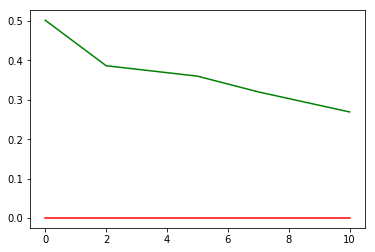

Working on... ABB
15.848931924611133
Window: 0
[[54 52]
 [80 65]]
F1,score 0.4961832061068703
Accuracy: 0.47410358565737054
0.15848931924611143
Window: 2
[[105  10]
 [114  22]]
F1,score 0.2619047619047619
Accuracy: 0.5059760956175299
0.003981071705534973
Window: 5
[[107   7]
 [108  28]]
F1,score 0.32748538011695905
Accuracy: 0.54
3.9810717055349722
Window: 7
[[107   6]
 [123  14]]
F1,score 0.17834394904458598
Accuracy: 0.484
10000.0
Window: 10
[[49 59]
 [56 85]]
F1,score 0.5964912280701754
Accuracy: 0.5381526104417671
[0, 0, 0, 0, 0]
[0.47410358565737054, 0.5059760956175299, 0.54, 0.484, 0.5381526104417671]
accuracy
accuracy


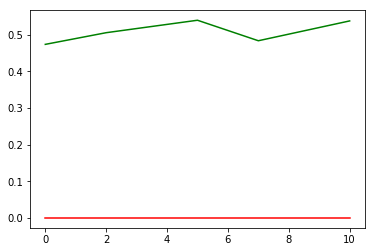

Working on... ABBV
1000.0
Window: 0
[[45 61]
 [53 76]]
F1,score 0.5714285714285715
Accuracy: 0.5148936170212766
10000.0
Window: 2
[[ 17  84]
 [ 18 115]]
F1,score 0.6927710843373494
Accuracy: 0.5641025641025641
10000.0
Window: 5
[[ 11  94]
 [ 14 115]]
F1,score 0.6804733727810651
Accuracy: 0.5384615384615384
251.18864315095797
Window: 7
[[ 20  92]
 [ 15 106]]
F1,score 0.664576802507837
Accuracy: 0.5407725321888412
10000.0
Window: 10
[[79 27]
 [72 55]]
F1,score 0.5263157894736842
Accuracy: 0.575107296137339
[0, 0, 0, 0, 0]
[0.5148936170212766, 0.5641025641025641, 0.5384615384615384, 0.5407725321888412, 0.575107296137339]
accuracy
accuracy


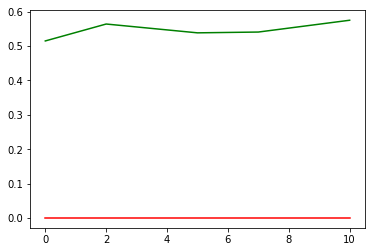

Working on... AEP
251.18864315095797
Window: 0
[[ 30  74]
 [ 37 110]]
F1,score 0.6646525679758308
Accuracy: 0.5577689243027888
15.848931924611133
Window: 2
[[46 54]
 [72 79]]
F1,score 0.5563380281690141
Accuracy: 0.49800796812749004
6.309573444801943
Window: 5
[[58 42]
 [90 60]]
F1,score 0.4761904761904762
Accuracy: 0.472
15.848931924611133
Window: 7
[[47 46]
 [80 77]]
F1,score 0.5499999999999999
Accuracy: 0.496
1.0
Window: 10
[[53 33]
 [95 68]]
F1,score 0.5151515151515151
Accuracy: 0.4859437751004016
[0, 0, 0, 0, 0]
[0.5577689243027888, 0.49800796812749004, 0.472, 0.496, 0.4859437751004016]
accuracy
accuracy


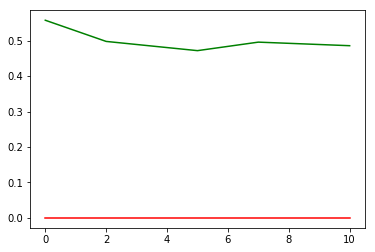

Working on... AGFS
1000.0
Window: 0
[[54  7]
 [66 13]]
F1,score 0.26262626262626265
Accuracy: 0.4785714285714286
251.18864315095797
Window: 2
[[49  7]
 [66 17]]
F1,score 0.3177570093457944
Accuracy: 0.4748201438848921
1.0
Window: 5
[[41  6]
 [86  6]]
F1,score 0.11538461538461539
Accuracy: 0.3381294964028777
0.0001
Window: 7
[[37  8]
 [89  4]]
F1,score 0.0761904761904762
Accuracy: 0.2971014492753623
0.0001
Window: 10
[[33  9]
 [95  1]]
F1,score 0.018867924528301886
Accuracy: 0.2463768115942029
[0, 0, 0, 0, 0]
[0.4785714285714286, 0.4748201438848921, 0.3381294964028777, 0.2971014492753623, 0.2463768115942029]
accuracy
accuracy


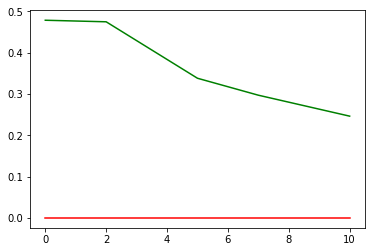

Working on... AMGN
3.9810717055349722
Window: 0
[[75 43]
 [94 39]]
F1,score 0.36279069767441857
Accuracy: 0.4541832669322709
3.9810717055349722
Window: 2
[[ 92  27]
 [106  26]]
F1,score 0.2810810810810811
Accuracy: 0.4701195219123506
63.0957344480193
Window: 5
[[80 46]
 [71 53]]
F1,score 0.4753363228699552
Accuracy: 0.532
3.9810717055349722
Window: 7
[[108  24]
 [ 86  32]]
F1,score 0.367816091954023
Accuracy: 0.56
15.848931924611133
Window: 10
[[106  19]
 [ 87  37]]
F1,score 0.4111111111111111
Accuracy: 0.5742971887550201
[0, 0, 0, 0, 0]
[0.4541832669322709, 0.4701195219123506, 0.532, 0.56, 0.5742971887550201]
accuracy
accuracy


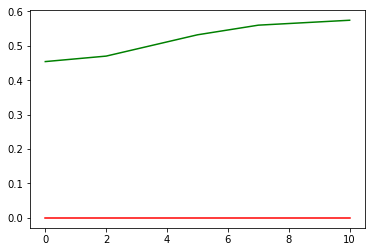

Working on... AMZN
251.18864315095797
Window: 0
[[127   0]
 [124   0]]
F1,score 0.0
Accuracy: 0.5059760956175299


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 2
[[107   0]
 [144   0]]
F1,score 0.0
Accuracy: 0.4262948207171315


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 5
[[ 13  93]
 [ 20 124]]
F1,score 0.6869806094182825
Accuracy: 0.548
10000.0
Window: 7
[[103   0]
 [147   0]]
F1,score 0.0
Accuracy: 0.412


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 10
[[  0  99]
 [  0 150]]
F1,score 0.7518796992481204
Accuracy: 0.6024096385542169
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.4262948207171315, 0.548, 0.412, 0.6024096385542169]
accuracy
accuracy


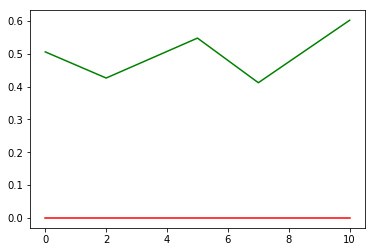

Working on... BA
63.0957344480193
Window: 0
[[112   5]
 [130   4]]
F1,score 0.055944055944055944
Accuracy: 0.46215139442231074
63.0957344480193
Window: 2
[[ 84   4]
 [156   7]]
F1,score 0.08045977011494254
Accuracy: 0.36254980079681276
10000.0
Window: 5
[[ 22  54]
 [ 51 123]]
F1,score 0.7008547008547009
Accuracy: 0.58
10000.0
Window: 7
[[ 61   0]
 [189   0]]
F1,score 0.0
Accuracy: 0.244


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


15.848931924611133
Window: 10
[[ 16  36]
 [ 90 107]]
F1,score 0.6294117647058824
Accuracy: 0.4939759036144578
[0, 0, 0, 0, 0]
[0.46215139442231074, 0.36254980079681276, 0.58, 0.244, 0.4939759036144578]
accuracy
accuracy


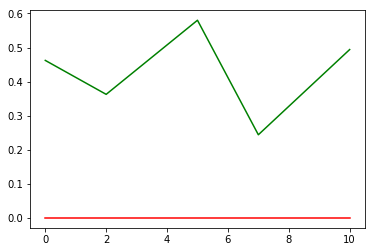

Working on... BABA
3.9810717055349722
Window: 0
[[78  0]
 [70  0]]
F1,score 0.0
Accuracy: 0.527027027027027


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 2
[[57  0]
 [91  0]]
F1,score 0.0
Accuracy: 0.38513513513513514


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


15.848931924611133
Window: 5
[[ 40   0]
 [107   0]]
F1,score 0.0
Accuracy: 0.272108843537415


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


15.848931924611133
Window: 7
[[ 26   0]
 [121   0]]
F1,score 0.0
Accuracy: 0.17687074829931973


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 10
[[ 17   0]
 [129   0]]
F1,score 0.0
Accuracy: 0.11643835616438356
[0, 0, 0, 0, 0]
[0.527027027027027, 0.38513513513513514, 0.272108843537415, 0.17687074829931973, 0.11643835616438356]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


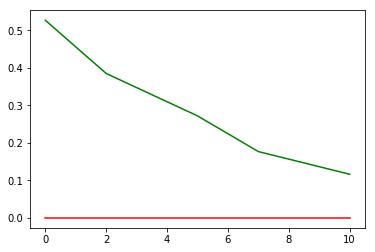

Working on... BAC
63.0957344480193
Window: 0
[[120   7]
 [117   7]]
F1,score 0.10144927536231885
Accuracy: 0.5059760956175299
63.0957344480193
Window: 2
[[120   0]
 [131   0]]
F1,score 0.0
Accuracy: 0.47808764940239046


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


3.9810717055349722
Window: 5
[[107   6]
 [131   6]]
F1,score 0.08053691275167786
Accuracy: 0.452
251.18864315095797
Window: 7
[[104   4]
 [135   7]]
F1,score 0.0915032679738562
Accuracy: 0.444
15.848931924611133
Window: 10
[[ 98   4]
 [134  13]]
F1,score 0.15853658536585366
Accuracy: 0.4457831325301205
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.47808764940239046, 0.452, 0.444, 0.4457831325301205]
accuracy
accuracy


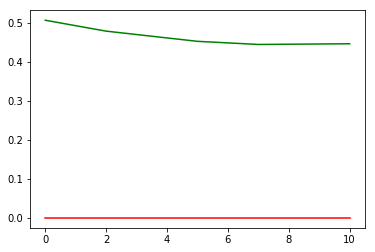

Working on... BBL
251.18864315095797
Window: 0
[[53 63]
 [42 93]]
F1,score 0.6391752577319588
Accuracy: 0.5816733067729084
63.0957344480193
Window: 2
[[68 36]
 [71 76]]
F1,score 0.5868725868725869
Accuracy: 0.5737051792828686
15.848931924611133
Window: 5
[[  0 107]
 [  0 143]]
F1,score 0.727735368956743
Accuracy: 0.572
251.18864315095797
Window: 7
[[111   1]
 [136   2]]
F1,score 0.028368794326241138
Accuracy: 0.452
251.18864315095797
Window: 10
[[118   0]
 [131   0]]
F1,score 0.0
Accuracy: 0.4738955823293173
[0, 0, 0, 0, 0]
[0.5816733067729084, 0.5737051792828686, 0.572, 0.452, 0.4738955823293173]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


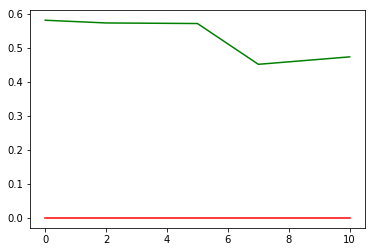

Working on... BCH
251.18864315095797
Window: 0
[[123   0]
 [128   0]]
F1,score 0.0
Accuracy: 0.4900398406374502


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


251.18864315095823
Window: 2
[[ 93  10]
 [128  20]]
F1,score 0.2247191011235955
Accuracy: 0.450199203187251
0.15848931924611143
Window: 5
[[ 97   1]
 [149   3]]
F1,score 0.03846153846153846
Accuracy: 0.4
251.18864315095797
Window: 7
[[ 74  22]
 [121  33]]
F1,score 0.3157894736842105
Accuracy: 0.428
10000.0
Window: 10
[[ 60  24]
 [112  53]]
F1,score 0.4380165289256199
Accuracy: 0.4538152610441767
[0, 0, 0, 0, 0]
[0.4900398406374502, 0.450199203187251, 0.4, 0.428, 0.4538152610441767]
accuracy
accuracy


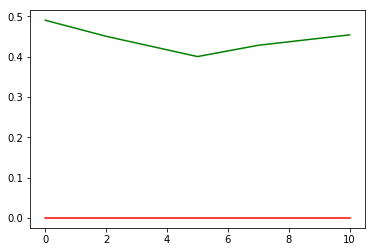

Working on... BHP
251.18864315095797
Window: 0
[[  1 110]
 [  1 139]]
F1,score 0.7146529562982006
Accuracy: 0.5577689243027888
251.18864315095823
Window: 2
[[106   0]
 [145   0]]
F1,score 0.0
Accuracy: 0.42231075697211157


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


251.18864315095823
Window: 5
[[104   0]
 [146   0]]
F1,score 0.0
Accuracy: 0.416


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
Window: 7
[[100  10]
 [120  20]]
F1,score 0.23529411764705882
Accuracy: 0.48
3.9810717055349722
Window: 10
[[112   0]
 [137   0]]
F1,score 0.0
Accuracy: 0.4497991967871486
[0, 0, 0, 0, 0]
[0.5577689243027888, 0.42231075697211157, 0.416, 0.48, 0.4497991967871486]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


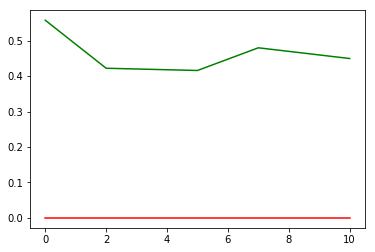

Working on... BP
10000.0
Window: 0
[[ 29 112]
 [ 15  95]]
F1,score 0.5993690851735016
Accuracy: 0.4940239043824701
15.848931924611133
Window: 2
[[132   1]
 [117   1]]
F1,score 0.016666666666666666
Accuracy: 0.5298804780876494
1.0
Window: 5
[[103  20]
 [ 67  60]]
F1,score 0.5797101449275361
Accuracy: 0.652
10000.0
Window: 7
[[84 42]
 [36 88]]
F1,score 0.6929133858267716
Accuracy: 0.688
63.0957344480193
Window: 10
[[69 55]
 [32 93]]
F1,score 0.6813186813186813
Accuracy: 0.6506024096385542
[0, 0, 0, 0, 0]
[0.4940239043824701, 0.5298804780876494, 0.652, 0.688, 0.6506024096385542]
accuracy
accuracy


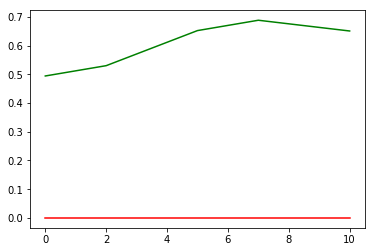

Working on... BRK-A
251.18864315095823
Window: 0
[[119   7]
 [120   5]]
F1,score 0.072992700729927
Accuracy: 0.4940239043824701
10000.0
Window: 2
[[ 25  99]
 [ 19 108]]
F1,score 0.6467065868263473
Accuracy: 0.5298804780876494
251.18864315095823
Window: 5
[[ 31  85]
 [ 21 113]]
F1,score 0.680722891566265
Accuracy: 0.576
63.0957344480193
Window: 7
[[118   0]
 [132   0]]
F1,score 0.0
Accuracy: 0.472


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


251.18864315095797
Window: 10
[[ 99   0]
 [150   0]]
F1,score 0.0
Accuracy: 0.39759036144578314
[0, 0, 0, 0, 0]
[0.4940239043824701, 0.5298804780876494, 0.576, 0.472, 0.39759036144578314]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


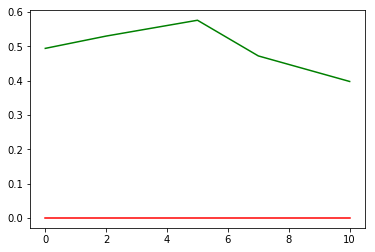

Working on... BSAC
1.0
Window: 0
[[80 38]
 [97 36]]
F1,score 0.3478260869565218
Accuracy: 0.46215139442231074
3.9810717055349722
Window: 2
[[116   0]
 [135   0]]
F1,score 0.0
Accuracy: 0.46215139442231074


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 5
[[101   0]
 [149   0]]
F1,score 0.0
Accuracy: 0.404


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


6.309573444801943
Window: 7
[[ 93   2]
 [152   3]]
F1,score 0.0375
Accuracy: 0.384
0.15848931924611143
Window: 10
[[ 81  13]
 [133  22]]
F1,score 0.23157894736842105
Accuracy: 0.41365461847389556
[0, 0, 0, 0, 0]
[0.46215139442231074, 0.46215139442231074, 0.404, 0.384, 0.41365461847389556]
accuracy
accuracy


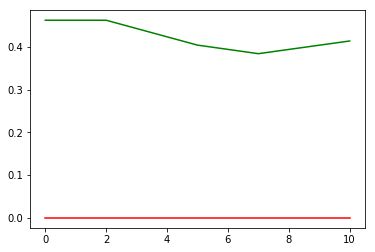

Working on... BUD
1000.0
Window: 0
[[ 21 108]
 [ 18 104]]
F1,score 0.6227544910179641
Accuracy: 0.49800796812749004
251.18864315095823
Window: 2
[[ 30  90]
 [ 23 108]]
F1,score 0.6565349544072948
Accuracy: 0.549800796812749
1000.0
Window: 5
[[ 25 103]
 [ 16 106]]
F1,score 0.6404833836858005
Accuracy: 0.524
251.18864315095823
Window: 7
[[ 29 104]
 [ 13 104]]
F1,score 0.64
Accuracy: 0.532
63.0957344480193
Window: 10
[[ 34 104]
 [  8 103]]
F1,score 0.6477987421383647
Accuracy: 0.5502008032128514
[0, 0, 0, 0, 0]
[0.49800796812749004, 0.549800796812749, 0.524, 0.532, 0.5502008032128514]
accuracy
accuracy


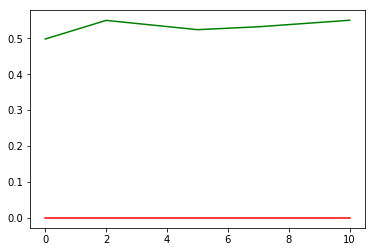

Working on... C
63.0957344480193
Window: 0
[[ 20  90]
 [ 35 106]]
F1,score 0.629080118694362
Accuracy: 0.50199203187251
251.18864315095797
Window: 2
[[111   2]
 [132   6]]
F1,score 0.0821917808219178
Accuracy: 0.46613545816733065
15.848931924611133
Window: 5
[[108   0]
 [141   1]]
F1,score 0.013986013986013986
Accuracy: 0.436
10000.0
Window: 7
[[100   0]
 [149   1]]
F1,score 0.013245033112582783
Accuracy: 0.404
251.18864315095797
Window: 10
[[ 89   0]
 [158   2]]
F1,score 0.02469135802469136
Accuracy: 0.3654618473895582
[0, 0, 0, 0, 0]
[0.50199203187251, 0.46613545816733065, 0.436, 0.404, 0.3654618473895582]
accuracy
accuracy


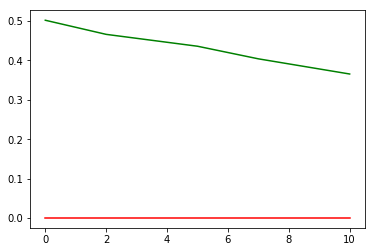

Working on... CAT
3.9810717055349722
Window: 0
[[97 26]
 [96 32]]
F1,score 0.3440860215053763
Accuracy: 0.5139442231075697
15.848931924611133
Window: 2
[[108   2]
 [135   6]]
F1,score 0.08053691275167785
Accuracy: 0.4541832669322709
15.848931924611133
Window: 5
[[107   1]
 [135   7]]
F1,score 0.09333333333333332
Accuracy: 0.456
15.848931924611133
Window: 7
[[67 43]
 [90 50]]
F1,score 0.42918454935622313
Accuracy: 0.468
0.003981071705534973
Window: 10
[[ 97   0]
 [146   6]]
F1,score 0.07594936708860758
Accuracy: 0.41365461847389556
[0, 0, 0, 0, 0]
[0.5139442231075697, 0.4541832669322709, 0.456, 0.468, 0.41365461847389556]
accuracy
accuracy


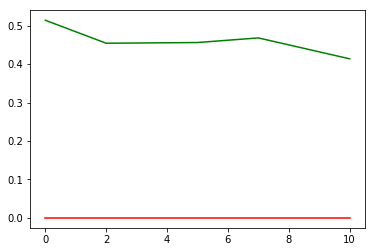

Working on... CELG
63.0957344480193
Window: 0
[[122   2]
 [123   4]]
F1,score 0.06015037593984962
Accuracy: 0.50199203187251
3.9810717055349722
Window: 2
[[120   0]
 [129   2]]
F1,score 0.03007518796992481
Accuracy: 0.4860557768924303
251.18864315095797
Window: 5
[[109   6]
 [120  15]]
F1,score 0.19230769230769232
Accuracy: 0.496
63.0957344480193
Window: 7
[[112   2]
 [126  10]]
F1,score 0.13513513513513514
Accuracy: 0.488
15.848931924611133
Window: 10
[[115   0]
 [127   7]]
F1,score 0.09929078014184396
Accuracy: 0.4899598393574297
[0, 0, 0, 0, 0]
[0.50199203187251, 0.4860557768924303, 0.496, 0.488, 0.4899598393574297]
accuracy
accuracy


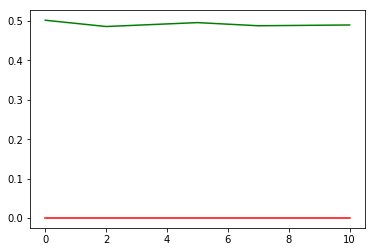

Working on... CHL
251.18864315095823
Window: 0
[[57 67]
 [52 75]]
F1,score 0.5576208178438662
Accuracy: 0.5258964143426295
63.0957344480193
Window: 2
[[63 76]
 [36 76]]
F1,score 0.5757575757575758
Accuracy: 0.5537848605577689
0.0001
Window: 5
[[60 88]
 [25 77]]
F1,score 0.5767790262172284
Accuracy: 0.548
251.18864315095797
Window: 7
[[73 67]
 [32 78]]
F1,score 0.6117647058823529
Accuracy: 0.604
1000.0
Window: 10
[[71 70]
 [24 84]]
F1,score 0.6412213740458015
Accuracy: 0.6224899598393574
[0, 0, 0, 0, 0]
[0.5258964143426295, 0.5537848605577689, 0.548, 0.604, 0.6224899598393574]
accuracy
accuracy


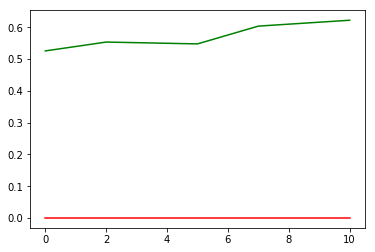

Working on... CHTR
1000.0
Window: 0
[[119   2]
 [129   1]]
F1,score 0.015037593984962405
Accuracy: 0.47808764940239046
251.18864315095823
Window: 2
[[ 93  17]
 [130  11]]
F1,score 0.1301775147928994
Accuracy: 0.41434262948207173
0.003981071705534973
Window: 5
[[  0 106]
 [  0 144]]
F1,score 0.730964467005076
Accuracy: 0.576
0.003981071705534973
Window: 7
[[  0 101]
 [  0 149]]
F1,score 0.7468671679197995
Accuracy: 0.596
0.003981071705534973
Window: 10
[[  0  85]
 [  0 164]]
F1,score 0.7941888619854721
Accuracy: 0.6586345381526104
[0, 0, 0, 0, 0]
[0.47808764940239046, 0.41434262948207173, 0.576, 0.596, 0.6586345381526104]
accuracy
accuracy


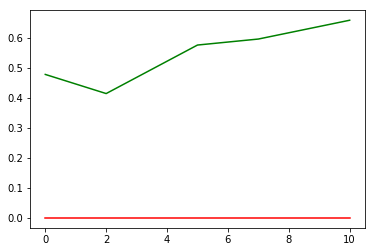

Working on... CMCSA
63.0957344480193
Window: 0
[[87 37]
 [90 37]]
F1,score 0.3681592039800995
Accuracy: 0.4940239043824701
63.0957344480193
Window: 2
[[54 59]
 [71 67]]
F1,score 0.5075757575757576
Accuracy: 0.4820717131474104
3.9810717055349722
Window: 5
[[116   5]
 [122   7]]
F1,score 0.09929078014184396
Accuracy: 0.492
6.309573444801943
Window: 7
[[ 83  27]
 [116  24]]
F1,score 0.25130890052356025
Accuracy: 0.428
1000.0
Window: 10
[[ 95   0]
 [145   9]]
F1,score 0.11042944785276072
Accuracy: 0.41767068273092367
[0, 0, 0, 0, 0]
[0.4940239043824701, 0.4820717131474104, 0.492, 0.428, 0.41767068273092367]
accuracy
accuracy


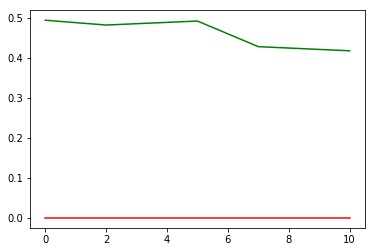

Working on... CODI
3.9810717055349722
Window: 0
[[116   0]
 [135   0]]
F1,score 0.0
Accuracy: 0.46215139442231074


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


6.309573444801943
Window: 2
[[115   0]
 [136   0]]
F1,score 0.0
Accuracy: 0.4581673306772908


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


251.18864315095823
Window: 5
[[114   0]
 [136   0]]
F1,score 0.0
Accuracy: 0.456


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


3.9810717055349722
Window: 7
[[113   0]
 [137   0]]
F1,score 0.0
Accuracy: 0.452


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


10000.0
Window: 10
[[110  10]
 [ 99  30]]
F1,score 0.3550295857988166
Accuracy: 0.5622489959839357
[0, 0, 0, 0, 0]
[0.46215139442231074, 0.4581673306772908, 0.456, 0.452, 0.5622489959839357]
accuracy
accuracy


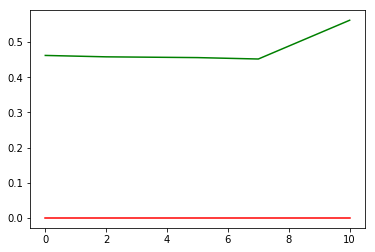

Working on... CSCO
1.0
Window: 0
[[118   0]
 [133   0]]
F1,score 0.0
Accuracy: 0.4701195219123506


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.15848931924611143
Window: 2
[[  0 113]
 [  0 138]]
F1,score 0.7095115681233933
Accuracy: 0.549800796812749
0.15848931924611143
Window: 5
[[122   0]
 [128   0]]
F1,score 0.0
Accuracy: 0.488


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.003981071705534973
Window: 7
[[ 12 109]
 [ 23 106]]
F1,score 0.616279069767442
Accuracy: 0.472
63.0957344480193
Window: 10
[[127   0]
 [122   0]]
F1,score 0.0
Accuracy: 0.5100401606425703
[0, 0, 0, 0, 0]
[0.4701195219123506, 0.549800796812749, 0.488, 0.472, 0.5100401606425703]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


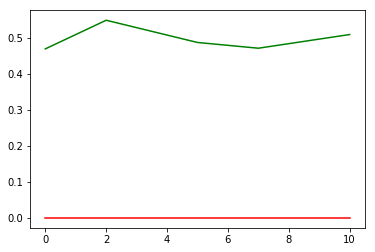

Working on... CVX
3.9810717055349722
Window: 0
[[117  19]
 [ 93  22]]
F1,score 0.28205128205128205
Accuracy: 0.5537848605577689
15.848931924611133
Window: 2
[[125   0]
 [124   2]]
F1,score 0.03125
Accuracy: 0.5059760956175299
6.309573444801943
Window: 5
[[116   0]
 [133   1]]
F1,score 0.014814814814814815
Accuracy: 0.468
15.848931924611133
Window: 7
[[125   0]
 [123   2]]
F1,score 0.031496062992125984
Accuracy: 0.508
1.0
Window: 10
[[123   7]
 [ 98  21]]
F1,score 0.2857142857142857
Accuracy: 0.5783132530120482
[0, 0, 0, 0, 0]
[0.5537848605577689, 0.5059760956175299, 0.468, 0.508, 0.5783132530120482]
accuracy
accuracy


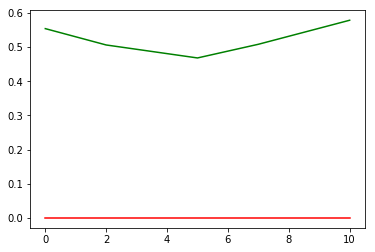

Working on... D
251.18864315095797
Window: 0
[[27 80]
 [51 93]]
F1,score 0.5867507886435332
Accuracy: 0.47808764940239046
10000.0
Window: 2
[[99 18]
 [90 44]]
F1,score 0.4489795918367347
Accuracy: 0.5697211155378487
15.848931924611133
Window: 5
[[57 50]
 [58 85]]
F1,score 0.6115107913669066
Accuracy: 0.568
63.0957344480193
Window: 7
[[ 87  19]
 [113  31]]
F1,score 0.3195876288659794
Accuracy: 0.472
6.309573444801943
Window: 10
[[102   0]
 [116  31]]
F1,score 0.34831460674157305
Accuracy: 0.5341365461847389
[0, 0, 0, 0, 0]
[0.47808764940239046, 0.5697211155378487, 0.568, 0.472, 0.5341365461847389]
accuracy
accuracy


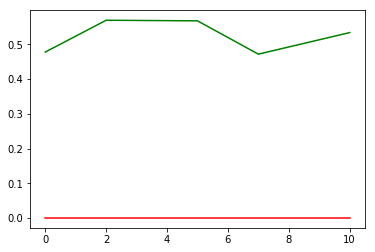

Working on... DHR
1.0
Window: 0
[[90 33]
 [91 37]]
F1,score 0.3737373737373737
Accuracy: 0.5059760956175299
10000.0
Window: 2
[[62 64]
 [52 73]]
F1,score 0.5572519083969465
Accuracy: 0.5378486055776892
10000.0
Window: 5
[[67 54]
 [62 67]]
F1,score 0.536
Accuracy: 0.536
1000.0
Window: 7
[[90 26]
 [77 57]]
F1,score 0.5253456221198156
Accuracy: 0.588
1.0
Window: 10
[[102  15]
 [118  14]]
F1,score 0.1739130434782609
Accuracy: 0.46586345381526106
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.5378486055776892, 0.536, 0.588, 0.46586345381526106]
accuracy
accuracy


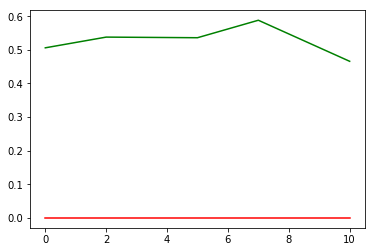

Working on... DIS
6.309573444801943
Window: 0
[[105  13]
 [117  16]]
F1,score 0.19753086419753085
Accuracy: 0.4820717131474104
1.0
Window: 2
[[54 56]
 [65 76]]
F1,score 0.5567765567765568
Accuracy: 0.5179282868525896
3.9810717055349722
Window: 5
[[66 38]
 [88 58]]
F1,score 0.4793388429752066
Accuracy: 0.496
63.0957344480193
Window: 7
[[100   2]
 [148   0]]
F1,score 0.0
Accuracy: 0.4
63.0957344480193
Window: 10
[[ 99   2]
 [146   2]]
F1,score 0.026315789473684213
Accuracy: 0.40562248995983935
[0, 0, 0, 0, 0]
[0.4820717131474104, 0.5179282868525896, 0.496, 0.4, 0.40562248995983935]
accuracy
accuracy


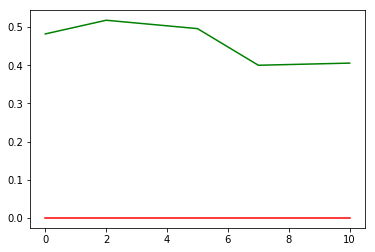

Working on... DUK
15.848931924611133
Window: 0
[[ 35  76]
 [ 40 100]]
F1,score 0.6329113924050633
Accuracy: 0.5378486055776892
251.18864315095797
Window: 2
[[  9  90]
 [  3 149]]
F1,score 0.762148337595908
Accuracy: 0.6294820717131474
10000.0
Window: 5
[[66 33]
 [95 56]]
F1,score 0.4666666666666667
Accuracy: 0.488
10000.0
Window: 7
[[67 25]
 [98 60]]
F1,score 0.49382716049382724
Accuracy: 0.508
10000.0
Window: 10
[[ 65  20]
 [117  47]]
F1,score 0.4069264069264069
Accuracy: 0.4497991967871486
[0, 0, 0, 0, 0]
[0.5378486055776892, 0.6294820717131474, 0.488, 0.508, 0.4497991967871486]
accuracy
accuracy


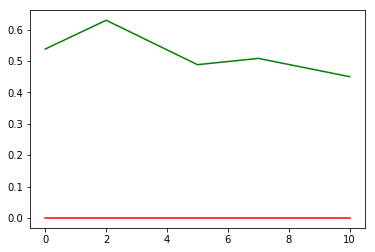

Working on... EXC
10000.0
Window: 0
[[118   3]
 [126   4]]
F1,score 0.05839416058394161
Accuracy: 0.4860557768924303
63.0957344480193
Window: 2
[[106   4]
 [126  15]]
F1,score 0.1875
Accuracy: 0.4820717131474104
15.848931924611133
Window: 5
[[75 42]
 [75 58]]
F1,score 0.49785407725321884
Accuracy: 0.532
1000.0
Window: 7
[[ 47  59]
 [ 44 100]]
F1,score 0.6600660066006601
Accuracy: 0.588
0.003981071705534973
Window: 10
[[82 29]
 [85 53]]
F1,score 0.4818181818181818
Accuracy: 0.5421686746987951
[0, 0, 0, 0, 0]
[0.4860557768924303, 0.4820717131474104, 0.532, 0.588, 0.5421686746987951]
accuracy
accuracy


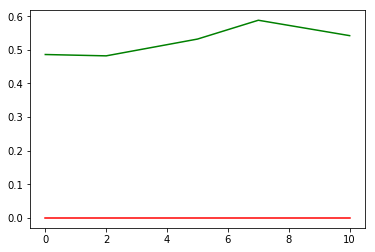

Working on... FB
10000.0
Window: 0
[[59 59]
 [65 68]]
F1,score 0.523076923076923
Accuracy: 0.5059760956175299
0.003981071705534973
Window: 2
[[106   0]
 [145   0]]
F1,score 0.0
Accuracy: 0.42231075697211157


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


251.18864315095823
Window: 5
[[46 50]
 [90 64]]
F1,score 0.47761194029850745
Accuracy: 0.44
0.15848931924611143
Window: 7
[[ 92   0]
 [158   0]]
F1,score 0.0
Accuracy: 0.368


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


251.18864315095823
Window: 10
[[ 44  43]
 [104  58]]
F1,score 0.44106463878326996
Accuracy: 0.40963855421686746
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.42231075697211157, 0.44, 0.368, 0.40963855421686746]
accuracy
accuracy


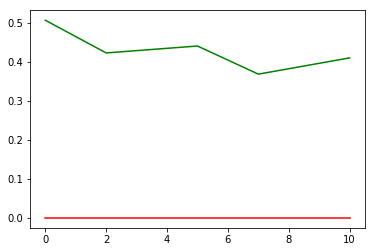

Working on... GD
3.9810717055349722
Window: 0
[[ 29  83]
 [ 37 102]]
F1,score 0.6296296296296297
Accuracy: 0.5219123505976095
63.0957344480193
Window: 2
[[52 60]
 [66 73]]
F1,score 0.5367647058823528
Accuracy: 0.49800796812749004
251.18864315095823
Window: 5
[[ 35  61]
 [ 48 106]]
F1,score 0.660436137071651
Accuracy: 0.564
1000.0
Window: 7
[[ 90   0]
 [159   1]]
F1,score 0.012422360248447204
Accuracy: 0.364
1000.0
Window: 10
[[ 88   0]
 [161   0]]
F1,score 0.0
Accuracy: 0.3534136546184739
[0, 0, 0, 0, 0]
[0.5219123505976095, 0.49800796812749004, 0.564, 0.364, 0.3534136546184739]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


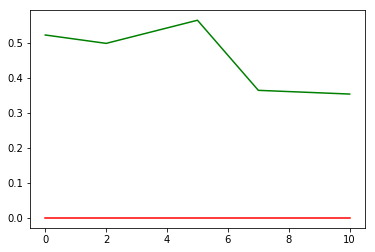

Working on... GE
1000.0
Window: 0
[[  3 134]
 [  4 110]]
F1,score 0.6145251396648045
Accuracy: 0.450199203187251
10000.0
Window: 2
[[ 27 116]
 [ 18  90]]
F1,score 0.5732484076433121
Accuracy: 0.46613545816733065
15.848931924611133
Window: 5
[[135  21]
 [ 83  11]]
F1,score 0.1746031746031746
Accuracy: 0.584
15.848931924611133
Window: 7
[[  7 155]
 [  0  88]]
F1,score 0.5317220543806647
Accuracy: 0.38
1000.0
Window: 10
[[ 57 113]
 [ 25  54]]
F1,score 0.43902439024390244
Accuracy: 0.4457831325301205
[0, 0, 0, 0, 0]
[0.450199203187251, 0.46613545816733065, 0.584, 0.38, 0.4457831325301205]
accuracy
accuracy


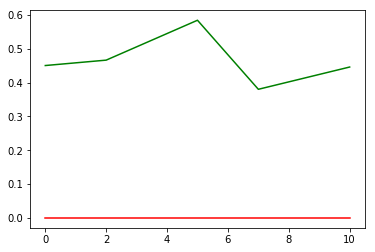

Working on... GMRE
1.0
Window: 0
[[ 8 26]
 [ 5 20]]
F1,score 0.5633802816901409
Accuracy: 0.4745762711864407
1.0
Window: 2
[[21 10]
 [12 15]]
F1,score 0.576923076923077
Accuracy: 0.6206896551724138
1000.0
Window: 5
[[14 17]
 [ 6 21]]
F1,score 0.6461538461538462
Accuracy: 0.603448275862069
1.0
Window: 7
[[29  3]
 [12 13]]
F1,score 0.6341463414634146
Accuracy: 0.7368421052631579
63.0957344480193
Window: 10
[[11 22]
 [10 14]]
F1,score 0.4666666666666666
Accuracy: 0.43859649122807015
[0, 0, 0, 0, 0]
[0.4745762711864407, 0.6206896551724138, 0.603448275862069, 0.7368421052631579, 0.43859649122807015]
accuracy
accuracy


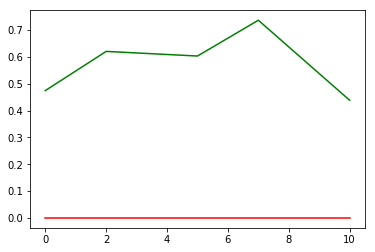

Working on... GOOG
1000.0
Window: 0
[[ 70  39]
 [109  33]]
F1,score 0.30841121495327106
Accuracy: 0.4103585657370518
63.0957344480193
Window: 2
[[31 72]
 [60 88]]
F1,score 0.5714285714285715
Accuracy: 0.47410358565737054
1000.0
Window: 5
[[ 64  37]
 [104  45]]
F1,score 0.3896103896103897
Accuracy: 0.436
251.18864315095797
Window: 7
[[107   0]
 [142   1]]
F1,score 0.013888888888888888
Accuracy: 0.432
10000.0
Window: 10
[[31 71]
 [61 86]]
F1,score 0.5657894736842104
Accuracy: 0.46987951807228917
[0, 0, 0, 0, 0]
[0.4103585657370518, 0.47410358565737054, 0.436, 0.432, 0.46987951807228917]
accuracy
accuracy


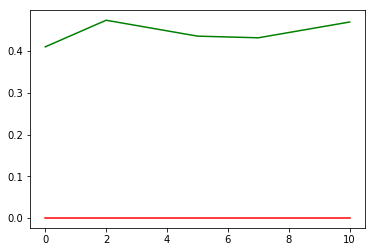

Working on... HD
63.0957344480193
Window: 0
[[111  11]
 [118  11]]
F1,score 0.1456953642384106
Accuracy: 0.4860557768924303
10000.0
Window: 2
[[61 53]
 [78 59]]
F1,score 0.4738955823293173
Accuracy: 0.47808764940239046
10000.0
Window: 5
[[69 40]
 [87 54]]
F1,score 0.4595744680851064
Accuracy: 0.492
10000.0
Window: 7
[[ 22  86]
 [ 28 114]]
F1,score 0.6666666666666666
Accuracy: 0.544
10000.0
Window: 10
[[69 39]
 [68 73]]
F1,score 0.5770750988142294
Accuracy: 0.570281124497992
[0, 0, 0, 0, 0]
[0.4860557768924303, 0.47808764940239046, 0.492, 0.544, 0.570281124497992]
accuracy
accuracy


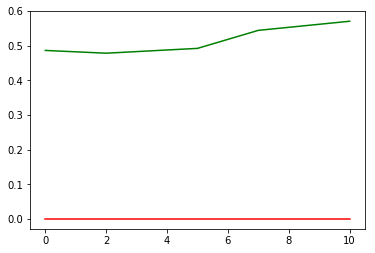

Working on... HON
1000.0
Window: 0
[[105  25]
 [ 95  26]]
F1,score 0.3023255813953489
Accuracy: 0.5219123505976095
251.18864315095823
Window: 2
[[ 13  92]
 [ 12 134]]
F1,score 0.7204301075268817
Accuracy: 0.5856573705179283
251.18864315095797
Window: 5
[[ 38  59]
 [ 42 111]]
F1,score 0.6873065015479876
Accuracy: 0.596
15.848931924611133
Window: 7
[[ 25  63]
 [ 37 125]]
F1,score 0.7142857142857142
Accuracy: 0.6
251.18864315095797
Window: 10
[[ 65  11]
 [115  58]]
F1,score 0.4793388429752066
Accuracy: 0.4939759036144578
[0, 0, 0, 0, 0]
[0.5219123505976095, 0.5856573705179283, 0.596, 0.6, 0.4939759036144578]
accuracy
accuracy


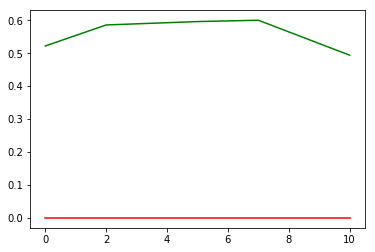

Working on... HRG
251.18864315095797
Window: 0
[[39 78]
 [49 85]]
F1,score 0.5723905723905724
Accuracy: 0.4940239043824701
251.18864315095797
Window: 2
[[73 50]
 [69 59]]
F1,score 0.49789029535864976
Accuracy: 0.5258964143426295
251.18864315095797
Window: 5
[[47 77]
 [49 77]]
F1,score 0.55
Accuracy: 0.496
63.0957344480193
Window: 7
[[  0 119]
 [  4 127]]
F1,score 0.6737400530503979
Accuracy: 0.508
251.18864315095797
Window: 10
[[  1 123]
 [  3 122]]
F1,score 0.6594594594594595
Accuracy: 0.4939759036144578
[0, 0, 0, 0, 0]
[0.4940239043824701, 0.5258964143426295, 0.496, 0.508, 0.4939759036144578]
accuracy
accuracy


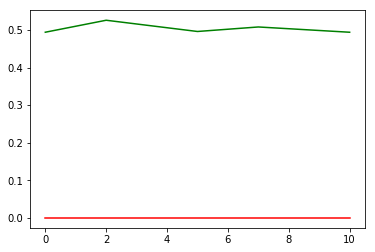

Working on... HSBC
1000.0
Window: 0
[[63 53]
 [79 56]]
F1,score 0.45901639344262296
Accuracy: 0.47410358565737054
10000.0
Window: 2
[[48 57]
 [72 74]]
F1,score 0.5342960288808665
Accuracy: 0.4860557768924303
3.9810717055349722
Window: 5
[[ 96   9]
 [127  18]]
F1,score 0.20930232558139536
Accuracy: 0.456
251.18864315095797
Window: 7
[[ 69  28]
 [106  47]]
F1,score 0.412280701754386
Accuracy: 0.464
251.18864315095823
Window: 10
[[ 66  17]
 [130  36]]
F1,score 0.3287671232876712
Accuracy: 0.40963855421686746
[0, 0, 0, 0, 0]
[0.47410358565737054, 0.4860557768924303, 0.456, 0.464, 0.40963855421686746]
accuracy
accuracy


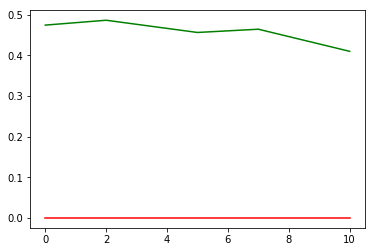

Working on... IEP
251.18864315095797
Window: 0
[[ 19 101]
 [ 10 121]]
F1,score 0.6855524079320113
Accuracy: 0.5577689243027888
3.9810717055349722
Window: 2
[[108  28]
 [ 86  29]]
F1,score 0.3372093023255814
Accuracy: 0.545816733067729
251.18864315095823
Window: 5
[[131   0]
 [118   1]]
F1,score 0.016666666666666666
Accuracy: 0.528
6.309573444801943
Window: 7
[[53 87]
 [30 80]]
F1,score 0.5776173285198556
Accuracy: 0.532
63.0957344480193
Window: 10
[[53 85]
 [25 86]]
F1,score 0.6099290780141843
Accuracy: 0.5582329317269076
[0, 0, 0, 0, 0]
[0.5577689243027888, 0.545816733067729, 0.528, 0.532, 0.5582329317269076]
accuracy
accuracy


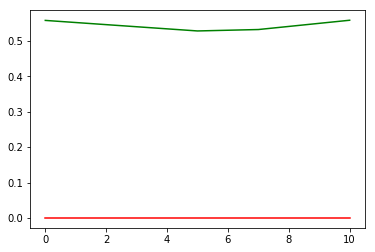

Working on... INTC
1.0
Window: 0
[[107  19]
 [ 97  28]]
F1,score 0.3255813953488372
Accuracy: 0.5378486055776892
10000.0
Window: 2
[[125   0]
 [125   1]]
F1,score 0.015748031496062992
Accuracy: 0.50199203187251
3.9810717055349722
Window: 5
[[127   0]
 [123   0]]
F1,score 0.0
Accuracy: 0.508


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


10000.0
Window: 7
[[107  11]
 [ 89  43]]
F1,score 0.46236559139784944
Accuracy: 0.6
1000.0
Window: 10
[[ 10 112]
 [  8 119]]
F1,score 0.6648044692737429
Accuracy: 0.5180722891566265
[0, 0, 0, 0, 0]
[0.5378486055776892, 0.50199203187251, 0.508, 0.6, 0.5180722891566265]
accuracy
accuracy


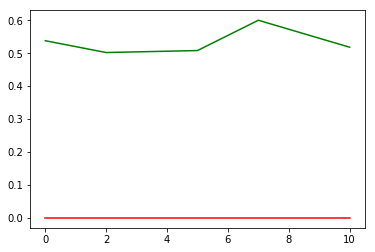

Working on... JNJ
10000.0
Window: 0
[[68 47]
 [87 49]]
F1,score 0.42241379310344823
Accuracy: 0.46613545816733065
1000.0
Window: 2
[[ 35  82]
 [ 24 110]]
F1,score 0.6748466257668712
Accuracy: 0.5776892430278885
251.18864315095797
Window: 5
[[48 72]
 [46 84]]
F1,score 0.5874125874125874
Accuracy: 0.528
251.18864315095797
Window: 7
[[51 68]
 [41 90]]
F1,score 0.6228373702422146
Accuracy: 0.564
251.18864315095797
Window: 10
[[42 80]
 [39 88]]
F1,score 0.5966101694915255
Accuracy: 0.5220883534136547
[0, 0, 0, 0, 0]
[0.46613545816733065, 0.5776892430278885, 0.528, 0.564, 0.5220883534136547]
accuracy
accuracy


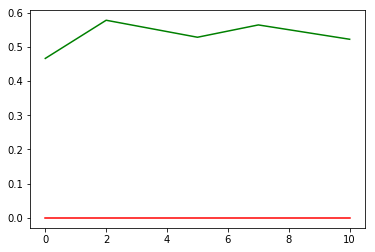

Working on... JPM
1000.0
Window: 0
[[108   4]
 [129  10]]
F1,score 0.13071895424836602
Accuracy: 0.4701195219123506
15.848931924611133
Window: 2
[[ 20  90]
 [ 29 112]]
F1,score 0.653061224489796
Accuracy: 0.5258964143426295
251.18864315095823
Window: 5
[[ 89  14]
 [125  22]]
F1,score 0.24043715846994537
Accuracy: 0.444
6.309573444801943
Window: 7
[[ 92  11]
 [116  31]]
F1,score 0.3280423280423281
Accuracy: 0.492
6.309573444801943
Window: 10
[[ 10  84]
 [ 47 108]]
F1,score 0.622478386167147
Accuracy: 0.4738955823293173
[0, 0, 0, 0, 0]
[0.4701195219123506, 0.5258964143426295, 0.444, 0.492, 0.4738955823293173]
accuracy
accuracy


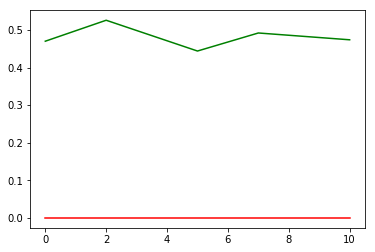

Working on... KO
15.848931924611133
Window: 0
[[  0 115]
 [  0 136]]
F1,score 0.7028423772609819
Accuracy: 0.5418326693227091
3.9810717055349722
Window: 2
[[ 76  29]
 [116  30]]
F1,score 0.29268292682926833
Accuracy: 0.42231075697211157
1000.0
Window: 5
[[  9 100]
 [  3 138]]
F1,score 0.7282321899736147
Accuracy: 0.588
10000.0
Window: 7
[[43 70]
 [44 93]]
F1,score 0.62
Accuracy: 0.544
10000.0
Window: 10
[[ 10 100]
 [  0 139]]
F1,score 0.7354497354497355
Accuracy: 0.5983935742971888
[0, 0, 0, 0, 0]
[0.5418326693227091, 0.42231075697211157, 0.588, 0.544, 0.5983935742971888]
accuracy
accuracy


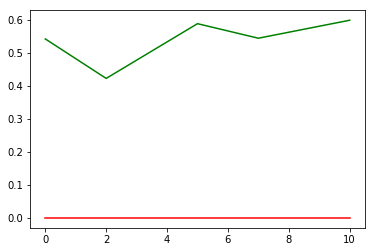

Working on... LMT
10000.0
Window: 0
[[ 23 105]
 [ 17 106]]
F1,score 0.6347305389221557
Accuracy: 0.5139442231075697
251.18864315095823
Window: 2
[[75 39]
 [99 38]]
F1,score 0.3551401869158878
Accuracy: 0.450199203187251
10000.0
Window: 5
[[  3 100]
 [  8 139]]
F1,score 0.7202072538860105
Accuracy: 0.568
10000.0
Window: 7
[[  1  96]
 [  0 153]]
F1,score 0.7611940298507462
Accuracy: 0.616
1000.0
Window: 10
[[  5  80]
 [  1 163]]
F1,score 0.8009828009828011
Accuracy: 0.6746987951807228
[0, 0, 0, 0, 0]
[0.5139442231075697, 0.450199203187251, 0.568, 0.616, 0.6746987951807228]
accuracy
accuracy


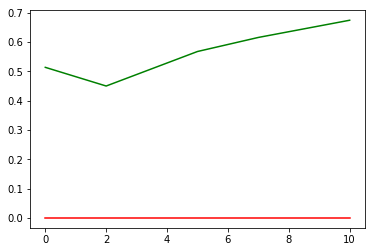

Working on... MA
10000.0
Window: 0
[[73 41]
 [82 55]]
F1,score 0.47210300429184554
Accuracy: 0.5099601593625498
251.18864315095797
Window: 2
[[ 27  60]
 [ 58 106]]
F1,score 0.6424242424242423
Accuracy: 0.5298804780876494
1000.0
Window: 5
[[ 43  32]
 [104  71]]
F1,score 0.5107913669064748
Accuracy: 0.456
15.848931924611133
Window: 7
[[ 26  44]
 [ 78 102]]
F1,score 0.6257668711656442
Accuracy: 0.512
15.848931924611133
Window: 10
[[ 27  38]
 [ 82 102]]
F1,score 0.6296296296296297
Accuracy: 0.5180722891566265
[0, 0, 0, 0, 0]
[0.5099601593625498, 0.5298804780876494, 0.456, 0.512, 0.5180722891566265]
accuracy
accuracy


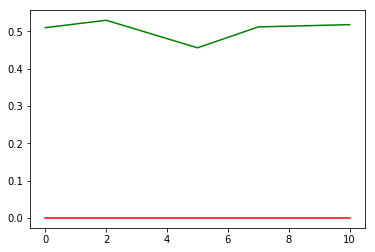

Working on... MCD
63.0957344480193
Window: 0
[[  0 121]
 [  0 130]]
F1,score 0.6824146981627296
Accuracy: 0.5179282868525896
0.15848931924611143
Window: 2
[[51 41]
 [91 68]]
F1,score 0.5074626865671642
Accuracy: 0.47410358565737054
0.15848931924611143
Window: 5
[[ 14  63]
 [ 63 110]]
F1,score 0.6358381502890174
Accuracy: 0.496
10000.0
Window: 7
[[ 54  19]
 [153  24]]
F1,score 0.21818181818181817
Accuracy: 0.312
10000.0
Window: 10
[[ 44  20]
 [163  22]]
F1,score 0.19383259911894274
Accuracy: 0.26506024096385544
[0, 0, 0, 0, 0]
[0.5179282868525896, 0.47410358565737054, 0.496, 0.312, 0.26506024096385544]
accuracy
accuracy


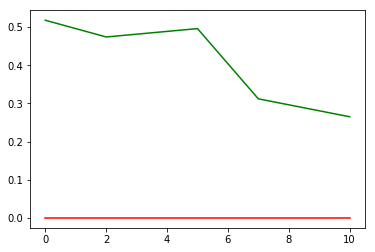

Working on... MDT
0.15848931924611143
Window: 0
[[ 11 105]
 [ 29 106]]
F1,score 0.6127167630057803
Accuracy: 0.46613545816733065
10000.0
Window: 2
[[  8 116]
 [  4 123]]
F1,score 0.6721311475409836
Accuracy: 0.5219123505976095
63.0957344480193
Window: 5
[[ 35  86]
 [ 13 116]]
F1,score 0.7009063444108762
Accuracy: 0.604
15.848931924611133
Window: 7
[[107  28]
 [ 72  43]]
F1,score 0.4623655913978495
Accuracy: 0.6
3.9810717055349722
Window: 10
[[113  19]
 [ 85  32]]
F1,score 0.380952380952381
Accuracy: 0.5823293172690763
[0, 0, 0, 0, 0]
[0.46613545816733065, 0.5219123505976095, 0.604, 0.6, 0.5823293172690763]
accuracy
accuracy


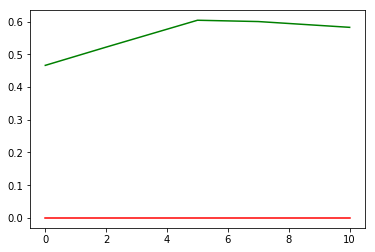

Working on... MMM
251.18864315095823
Window: 0
[[ 21 100]
 [ 12 118]]
F1,score 0.6781609195402298
Accuracy: 0.5537848605577689
10000.0
Window: 2
[[58 64]
 [64 65]]
F1,score 0.5038759689922481
Accuracy: 0.4900398406374502
15.848931924611133
Window: 5
[[ 88  25]
 [107  30]]
F1,score 0.31250000000000006
Accuracy: 0.472
0.15848931924611143
Window: 7
[[ 11 106]
 [ 17 116]]
F1,score 0.6535211267605633
Accuracy: 0.508
0.003981071705534973
Window: 10
[[ 11 101]
 [ 15 122]]
F1,score 0.6777777777777778
Accuracy: 0.5341365461847389
[0, 0, 0, 0, 0]
[0.5537848605577689, 0.4900398406374502, 0.472, 0.508, 0.5341365461847389]
accuracy
accuracy


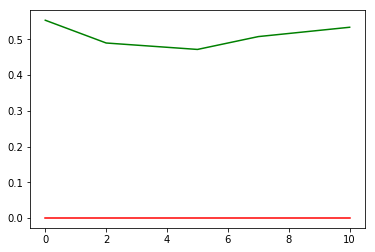

Working on... MO
251.18864315095823
Window: 0
[[57 59]
 [73 62]]
F1,score 0.48437499999999994
Accuracy: 0.47410358565737054
10000.0
Window: 2
[[ 29  96]
 [ 19 107]]
F1,score 0.6504559270516718
Accuracy: 0.5418326693227091
10000.0
Window: 5
[[63 52]
 [68 67]]
F1,score 0.5275590551181102
Accuracy: 0.52
10000.0
Window: 7
[[59 57]
 [43 91]]
F1,score 0.6453900709219857
Accuracy: 0.6
10000.0
Window: 10
[[56 63]
 [43 87]]
F1,score 0.6214285714285714
Accuracy: 0.5742971887550201
[0, 0, 0, 0, 0]
[0.47410358565737054, 0.5418326693227091, 0.52, 0.6, 0.5742971887550201]
accuracy
accuracy


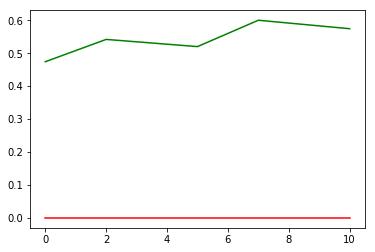

Working on... MRK
0.0001
Window: 0
[[126   0]
 [125   0]]
F1,score 0.0
Accuracy: 0.50199203187251


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


6.309573444801943
Window: 2
[[129   0]
 [122   0]]
F1,score 0.0
Accuracy: 0.5139442231075697


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000.0
Window: 5
[[140   0]
 [110   0]]
F1,score 0.0
Accuracy: 0.56


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


3.9810717055349722
Window: 7
[[131   0]
 [119   0]]
F1,score 0.0
Accuracy: 0.524


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


63.0957344480193
Window: 10
[[133   0]
 [116   0]]
F1,score 0.0
Accuracy: 0.5341365461847389
[0, 0, 0, 0, 0]
[0.50199203187251, 0.5139442231075697, 0.56, 0.524, 0.5341365461847389]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


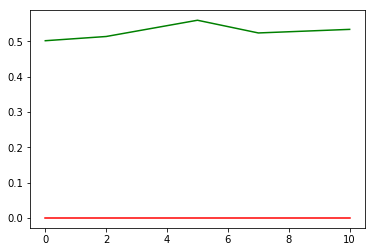

Working on... MSFT
0.0001
Window: 0
[[117   0]
 [134   0]]
F1,score 0.0
Accuracy: 0.46613545816733065


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


10000.0
Window: 2
[[36 69]
 [49 97]]
F1,score 0.6217948717948719
Accuracy: 0.5298804780876494
0.003981071705534973
Window: 5
[[109   0]
 [141   0]]
F1,score 0.0
Accuracy: 0.436


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


15.848931924611133
Window: 7
[[39 60]
 [56 95]]
F1,score 0.6209150326797386
Accuracy: 0.536
1000.0
Window: 10
[[ 11  91]
 [ 16 131]]
F1,score 0.7100271002710027
Accuracy: 0.570281124497992
[0, 0, 0, 0, 0]
[0.46613545816733065, 0.5298804780876494, 0.436, 0.536, 0.570281124497992]
accuracy
accuracy


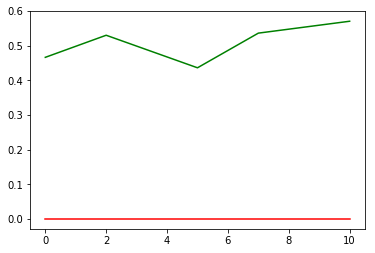

Working on... NEE
0.0001
Window: 0
[[100   0]
 [151   0]]
F1,score 0.0
Accuracy: 0.398406374501992


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


251.18864315095823
Window: 2
[[ 65  25]
 [115  46]]
F1,score 0.396551724137931
Accuracy: 0.44223107569721115
1000.0
Window: 5
[[ 46  28]
 [107  69]]
F1,score 0.5054945054945056
Accuracy: 0.46
251.18864315095797
Window: 7
[[ 63   7]
 [146  34]]
F1,score 0.30769230769230765
Accuracy: 0.388
251.18864315095823
Window: 10
[[ 62   9]
 [145  33]]
F1,score 0.3
Accuracy: 0.3815261044176707
[0, 0, 0, 0, 0]
[0.398406374501992, 0.44223107569721115, 0.46, 0.388, 0.3815261044176707]
accuracy
accuracy


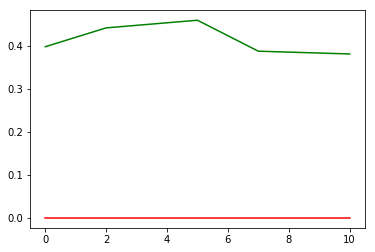

Working on... NGG
251.18864315095823
Window: 0
[[26 83]
 [44 98]]
F1,score 0.6068111455108358
Accuracy: 0.4940239043824701
10000.0
Window: 2
[[ 12 104]
 [  6 129]]
F1,score 0.7010869565217391
Accuracy: 0.5617529880478087
251.18864315095823
Window: 5
[[ 12 109]
 [  7 122]]
F1,score 0.6777777777777778
Accuracy: 0.536
10000.0
Window: 7
[[ 34  90]
 [ 22 104]]
F1,score 0.6499999999999999
Accuracy: 0.552
0.003981071705534973
Window: 10
[[ 20 100]
 [  8 121]]
F1,score 0.6914285714285715
Accuracy: 0.5662650602409639
[0, 0, 0, 0, 0]
[0.4940239043824701, 0.5617529880478087, 0.536, 0.552, 0.5662650602409639]
accuracy
accuracy


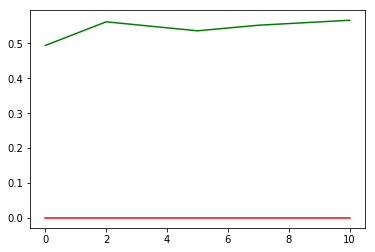

Working on... NVS
3.9810717055349722
Window: 0
[[  4 118]
 [  2 127]]
F1,score 0.6791443850267379
Accuracy: 0.5219123505976095
0.003981071705534973
Window: 2
[[41 75]
 [38 97]]
F1,score 0.6319218241042346
Accuracy: 0.549800796812749
3.9810717055349722
Window: 5
[[40 80]
 [32 98]]
F1,score 0.6363636363636364
Accuracy: 0.552
251.18864315095797
Window: 7
[[39 79]
 [33 99]]
F1,score 0.6387096774193549
Accuracy: 0.552
251.18864315095797
Window: 10
[[ 40  80]
 [ 29 100]]
F1,score 0.6472491909385113
Accuracy: 0.5622489959839357
[0, 0, 0, 0, 0]
[0.5219123505976095, 0.549800796812749, 0.552, 0.552, 0.5622489959839357]
accuracy
accuracy


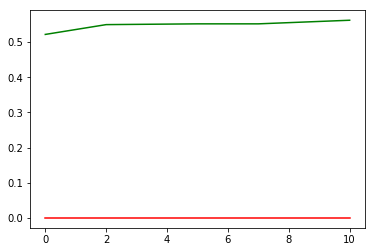

Working on... ORCL
10000.0
Window: 0
[[106   7]
 [126  12]]
F1,score 0.15286624203821658
Accuracy: 0.4701195219123506
1000.0
Window: 2
[[ 86  28]
 [106  31]]
F1,score 0.3163265306122449
Accuracy: 0.46613545816733065
63.0957344480193
Window: 5
[[114   5]
 [124   7]]
F1,score 0.0979020979020979
Accuracy: 0.484
10000.0
Window: 7
[[113   1]
 [131   5]]
F1,score 0.07042253521126761
Accuracy: 0.472
0.0001
Window: 10
[[107   3]
 [135   4]]
F1,score 0.0547945205479452
Accuracy: 0.4457831325301205
[0, 0, 0, 0, 0]
[0.4701195219123506, 0.46613545816733065, 0.484, 0.472, 0.4457831325301205]
accuracy
accuracy


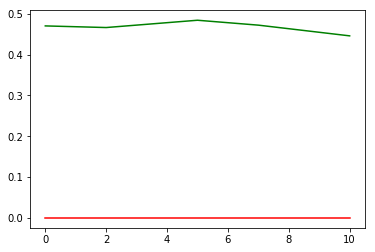

Working on... PCG
251.18864315095797
Window: 0
[[64 50]
 [86 51]]
F1,score 0.4285714285714286
Accuracy: 0.4581673306772908
10000.0
Window: 2
[[57 47]
 [66 81]]
F1,score 0.5890909090909091
Accuracy: 0.549800796812749
6.309573444801943
Window: 5
[[ 25  79]
 [ 46 100]]
F1,score 0.6153846153846153
Accuracy: 0.5
10000.0
Window: 7
[[62 37]
 [90 61]]
F1,score 0.4899598393574298
Accuracy: 0.492
251.18864315095797
Window: 10
[[ 80  14]
 [124  31]]
F1,score 0.31
Accuracy: 0.4457831325301205
[0, 0, 0, 0, 0]
[0.4581673306772908, 0.549800796812749, 0.5, 0.492, 0.4457831325301205]
accuracy
accuracy


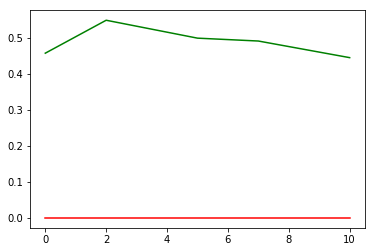

Working on... PCLN
10000.0
Window: 0
[[70 50]
 [85 46]]
F1,score 0.4052863436123348
Accuracy: 0.46215139442231074
0.0001
Window: 2
[[105   4]
 [142   0]]
F1,score 0.0
Accuracy: 0.41832669322709165
1.0
Window: 5
[[ 36  58]
 [ 55 101]]
F1,score 0.6412698412698412
Accuracy: 0.548
0.003981071705534973
Window: 7
[[ 86   0]
 [164   0]]
F1,score 0.0
Accuracy: 0.344


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.003981071705534973
Window: 10
[[ 78   0]
 [171   0]]
F1,score 0.0
Accuracy: 0.3132530120481928
[0, 0, 0, 0, 0]
[0.46215139442231074, 0.41832669322709165, 0.548, 0.344, 0.3132530120481928]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


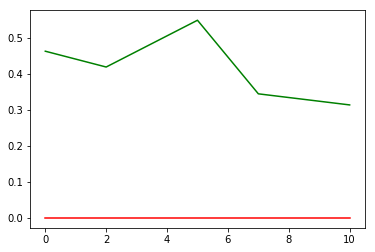

Working on... PEP
63.0957344480193
Window: 0
[[75 33]
 [88 55]]
F1,score 0.4761904761904762
Accuracy: 0.5179282868525896
1000.0
Window: 2
[[71 43]
 [67 70]]
F1,score 0.5599999999999999
Accuracy: 0.5617529880478087
10000.0
Window: 5
[[58 46]
 [65 81]]
F1,score 0.5934065934065934
Accuracy: 0.556
10000.0
Window: 7
[[74 39]
 [61 76]]
F1,score 0.6031746031746031
Accuracy: 0.6
10000.0
Window: 10
[[82 23]
 [89 55]]
F1,score 0.4954954954954956
Accuracy: 0.5502008032128514
[0, 0, 0, 0, 0]
[0.5179282868525896, 0.5617529880478087, 0.556, 0.6, 0.5502008032128514]
accuracy
accuracy


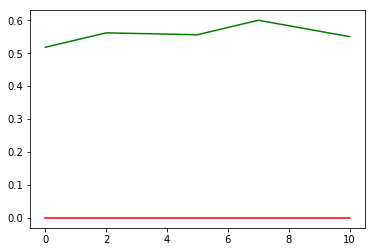

Working on... PFE
10000.0
Window: 0
[[  8 108]
 [ 10 125]]
F1,score 0.6793478260869564
Accuracy: 0.5298804780876494
0.003981071705534973
Window: 2
[[135   0]
 [115   1]]
F1,score 0.017094017094017096
Accuracy: 0.5418326693227091
0.0001
Window: 5
[[143   0]
 [106   1]]
F1,score 0.018518518518518517
Accuracy: 0.576
0.0001
Window: 7
[[146   1]
 [100   3]]
F1,score 0.056074766355140186
Accuracy: 0.596
251.18864315095797
Window: 10
[[ 12 134]
 [  0 103]]
F1,score 0.6058823529411765
Accuracy: 0.46184738955823296
[0, 0, 0, 0, 0]
[0.5298804780876494, 0.5418326693227091, 0.576, 0.596, 0.46184738955823296]
accuracy
accuracy


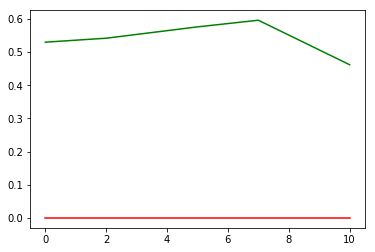

Working on... PG
63.0957344480193
Window: 0
[[78 42]
 [76 55]]
F1,score 0.4824561403508772
Accuracy: 0.5298804780876494
0.003981071705534973
Window: 2
[[122   0]
 [129   0]]
F1,score 0.0
Accuracy: 0.4860557768924303


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


63.0957344480193
Window: 5
[[120   0]
 [130   0]]
F1,score 0.0
Accuracy: 0.48


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.003981071705534973
Window: 7
[[115   0]
 [135   0]]
F1,score 0.0
Accuracy: 0.46


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


63.0957344480193
Window: 10
[[103   0]
 [146   0]]
F1,score 0.0
Accuracy: 0.41365461847389556
[0, 0, 0, 0, 0]
[0.5298804780876494, 0.4860557768924303, 0.48, 0.46, 0.41365461847389556]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


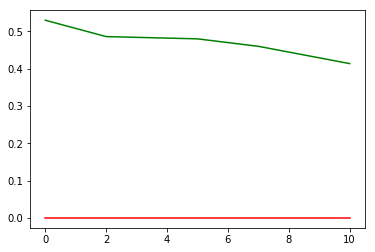

Working on... PICO
63.0957344480193
Window: 0
[[ 98  23]
 [108  22]]
F1,score 0.25142857142857145
Accuracy: 0.47808764940239046
10000.0
Window: 2
[[116   8]
 [122   5]]
F1,score 0.07142857142857144
Accuracy: 0.4820717131474104
63.0957344480193
Window: 5
[[104  25]
 [ 92  29]]
F1,score 0.3314285714285715
Accuracy: 0.532
63.0957344480193
Window: 7
[[105  25]
 [ 93  27]]
F1,score 0.3139534883720931
Accuracy: 0.528
15.848931924611133
Window: 10
[[116  13]
 [102  18]]
F1,score 0.23841059602649003
Accuracy: 0.5381526104417671
[0, 0, 0, 0, 0]
[0.47808764940239046, 0.4820717131474104, 0.532, 0.528, 0.5381526104417671]
accuracy
accuracy


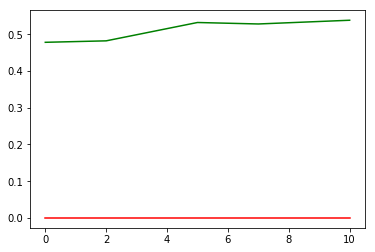

Working on... PM
10000.0
Window: 0
[[ 25  89]
 [ 36 101]]
F1,score 0.617737003058104
Accuracy: 0.50199203187251
1000.0
Window: 2
[[ 15  91]
 [ 26 119]]
F1,score 0.6704225352112677
Accuracy: 0.5338645418326693
1000.0
Window: 5
[[ 12  90]
 [ 45 103]]
F1,score 0.6041055718475073
Accuracy: 0.46
10000.0
Window: 7
[[ 18  82]
 [ 42 108]]
F1,score 0.6352941176470588
Accuracy: 0.504
10000.0
Window: 10
[[  8 104]
 [ 28 109]]
F1,score 0.6228571428571429
Accuracy: 0.46987951807228917
[0, 0, 0, 0, 0]
[0.50199203187251, 0.5338645418326693, 0.46, 0.504, 0.46987951807228917]
accuracy
accuracy


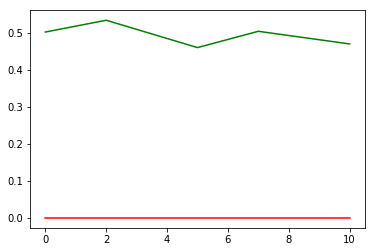

Working on... PPL
15.848931924611133
Window: 0
[[53 51]
 [56 91]]
F1,score 0.629757785467128
Accuracy: 0.5737051792828686
10000.0
Window: 2
[[ 83  23]
 [108  37]]
F1,score 0.36097560975609755
Accuracy: 0.47808764940239046
15.848931924611133
Window: 5
[[ 71  19]
 [112  48]]
F1,score 0.42290748898678415
Accuracy: 0.476
15.848931924611133
Window: 7
[[ 54  32]
 [106  58]]
F1,score 0.45669291338582674
Accuracy: 0.448
10000.0
Window: 10
[[49 32]
 [90 78]]
F1,score 0.5611510791366907
Accuracy: 0.5100401606425703
[0, 0, 0, 0, 0]
[0.5737051792828686, 0.47808764940239046, 0.476, 0.448, 0.5100401606425703]
accuracy
accuracy


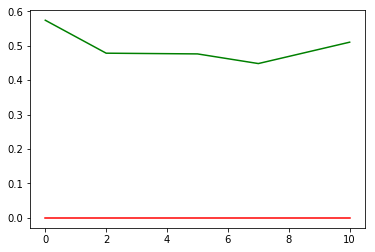

Working on... PTR
251.18864315095797
Window: 0
[[76 62]
 [69 44]]
F1,score 0.4018264840182649
Accuracy: 0.47808764940239046
15.848931924611133
Window: 2
[[125  20]
 [ 82  24]]
F1,score 0.32
Accuracy: 0.5936254980079682
0.003981071705534973
Window: 5
[[76 69]
 [40 65]]
F1,score 0.5439330543933055
Accuracy: 0.564
3.9810717055349722
Window: 7
[[129  21]
 [ 67  33]]
F1,score 0.42857142857142855
Accuracy: 0.648
10000.0
Window: 10
[[135  12]
 [ 67  35]]
F1,score 0.46979865771812085
Accuracy: 0.6827309236947792
[0, 0, 0, 0, 0]
[0.47808764940239046, 0.5936254980079682, 0.564, 0.648, 0.6827309236947792]
accuracy
accuracy


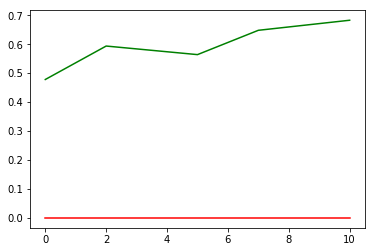

Working on... RDS-B
15.848931924611133
Window: 0
[[55 67]
 [54 75]]
F1,score 0.5535055350553505
Accuracy: 0.5179282868525896
63.0957344480193
Window: 2
[[117   6]
 [109  19]]
F1,score 0.2483660130718954
Accuracy: 0.5418326693227091
3.9810717055349722
Window: 5
[[115   6]
 [112  17]]
F1,score 0.2236842105263158
Accuracy: 0.528
0.003981071705534973
Window: 7
[[  3 126]
 [  0 121]]
F1,score 0.657608695652174
Accuracy: 0.496
6.309573444801943
Window: 10
[[127   2]
 [116   4]]
F1,score 0.06349206349206349
Accuracy: 0.5261044176706827
[0, 0, 0, 0, 0]
[0.5179282868525896, 0.5418326693227091, 0.528, 0.496, 0.5261044176706827]
accuracy
accuracy


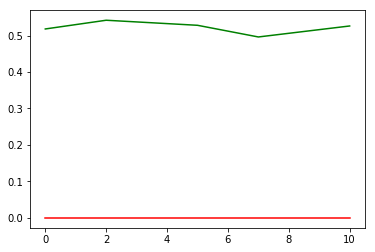

Working on... REX
1.0
Window: 0
[[56 73]
 [52 70]]
F1,score 0.5283018867924527
Accuracy: 0.50199203187251
15.848931924611133
Window: 2
[[57 72]
 [56 66]]
F1,score 0.5076923076923077
Accuracy: 0.4900398406374502
0.003981071705534973
Window: 5
[[60 66]
 [41 83]]
F1,score 0.608058608058608
Accuracy: 0.572
10000.0
Window: 7
[[  2 124]
 [  7 117]]
F1,score 0.6410958904109588
Accuracy: 0.476
1.0
Window: 10
[[118   0]
 [131   0]]
F1,score 0.0
Accuracy: 0.4738955823293173
[0, 0, 0, 0, 0]
[0.50199203187251, 0.4900398406374502, 0.572, 0.476, 0.4738955823293173]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


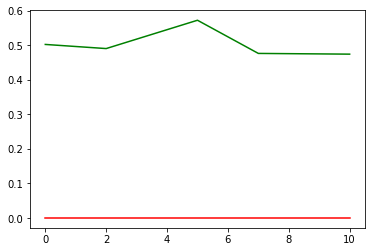

Working on... SLB
251.18864315095823
Window: 0
[[ 43 100]
 [ 30  78]]
F1,score 0.5454545454545454
Accuracy: 0.4820717131474104
6.309573444801943
Window: 2
[[94 52]
 [67 38]]
F1,score 0.38974358974358975
Accuracy: 0.5258964143426295
10000.0
Window: 5
[[63 80]
 [49 58]]
F1,score 0.473469387755102
Accuracy: 0.484
251.18864315095823
Window: 7
[[91 57]
 [44 58]]
F1,score 0.5345622119815668
Accuracy: 0.596
251.18864315095823
Window: 10
[[102  62]
 [ 53  32]]
F1,score 0.35754189944134074
Accuracy: 0.5381526104417671
[0, 0, 0, 0, 0]
[0.4820717131474104, 0.5258964143426295, 0.484, 0.596, 0.5381526104417671]
accuracy
accuracy


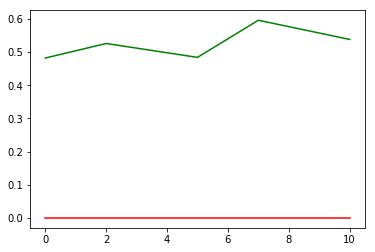

Working on... SNP
1000.0
Window: 0
[[90 30]
 [94 37]]
F1,score 0.3737373737373738
Accuracy: 0.5059760956175299
6.309573444801943
Window: 2
[[96 27]
 [86 42]]
F1,score 0.4263959390862945
Accuracy: 0.549800796812749
1.0
Window: 5
[[120   3]
 [101  26]]
F1,score 0.3333333333333333
Accuracy: 0.584
0.15848931924611143
Window: 7
[[124   2]
 [103  21]]
F1,score 0.2857142857142857
Accuracy: 0.58
1000.0
Window: 10
[[140   0]
 [109   0]]
F1,score 0.0
Accuracy: 0.5622489959839357
[0, 0, 0, 0, 0]
[0.5059760956175299, 0.549800796812749, 0.584, 0.58, 0.5622489959839357]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


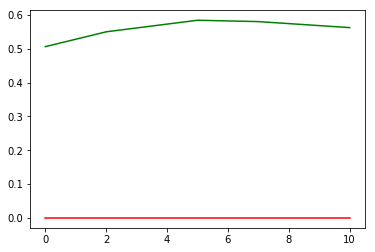

Working on... SNY
1.0
Window: 0
[[48 86]
 [41 76]]
F1,score 0.5448028673835125
Accuracy: 0.4940239043824701
10000.0
Window: 2
[[ 79  36]
 [102  34]]
F1,score 0.33009708737864074
Accuracy: 0.450199203187251
63.0957344480193
Window: 5
[[50 54]
 [79 67]]
F1,score 0.50187265917603
Accuracy: 0.468
63.0957344480193
Window: 7
[[45 56]
 [70 79]]
F1,score 0.5563380281690141
Accuracy: 0.496
63.0957344480193
Window: 10
[[39 56]
 [73 81]]
F1,score 0.5567010309278351
Accuracy: 0.4819277108433735
[0, 0, 0, 0, 0]
[0.4940239043824701, 0.450199203187251, 0.468, 0.496, 0.4819277108433735]
accuracy
accuracy


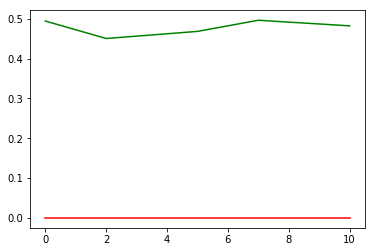

Working on... SO
251.18864315095797
Window: 0
[[87 38]
 [81 45]]
F1,score 0.430622009569378
Accuracy: 0.5258964143426295
1.0
Window: 2
[[ 27  97]
 [ 25 102]]
F1,score 0.6257668711656441
Accuracy: 0.5139442231075697
1.0
Window: 5
[[122   4]
 [115   9]]
F1,score 0.13138686131386862
Accuracy: 0.524
0.0001
Window: 7
[[82 47]
 [69 52]]
F1,score 0.4727272727272728
Accuracy: 0.536
63.0957344480193
Window: 10
[[ 36  83]
 [ 29 101]]
F1,score 0.6433121019108281
Accuracy: 0.5502008032128514
[0, 0, 0, 0, 0]
[0.5258964143426295, 0.5139442231075697, 0.524, 0.536, 0.5502008032128514]
accuracy
accuracy


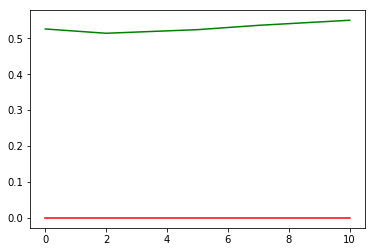

Working on... SPLP
251.18864315095797
Window: 0
[[ 62  34]
 [105  50]]
F1,score 0.41841004184100417
Accuracy: 0.44621513944223107
251.18864315095797
Window: 2
[[ 75  33]
 [113  30]]
F1,score 0.2912621359223301
Accuracy: 0.41832669322709165
15.848931924611133
Window: 5
[[ 69  36]
 [110  35]]
F1,score 0.32407407407407407
Accuracy: 0.416
15.848931924611133
Window: 7
[[ 73  39]
 [102  36]]
F1,score 0.33802816901408445
Accuracy: 0.436
3.9810717055349722
Window: 10
[[72 40]
 [99 38]]
F1,score 0.3534883720930233
Accuracy: 0.44176706827309237
[0, 0, 0, 0, 0]
[0.44621513944223107, 0.41832669322709165, 0.416, 0.436, 0.44176706827309237]
accuracy
accuracy


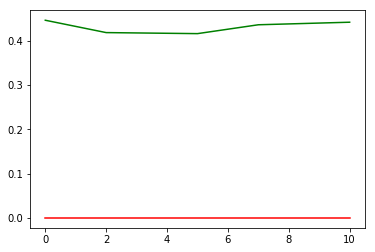

Working on... SRE
3.9810717055349722
Window: 0
[[72 46]
 [66 67]]
F1,score 0.5447154471544715
Accuracy: 0.5537848605577689
251.18864315095823
Window: 2
[[64 45]
 [71 71]]
F1,score 0.5503875968992248
Accuracy: 0.5378486055776892
251.18864315095823
Window: 5
[[78 23]
 [99 50]]
F1,score 0.45045045045045046
Accuracy: 0.512
1.0
Window: 7
[[ 93  10]
 [124  23]]
F1,score 0.2555555555555556
Accuracy: 0.464
63.0957344480193
Window: 10
[[ 86  10]
 [130  23]]
F1,score 0.24731182795698922
Accuracy: 0.43775100401606426
[0, 0, 0, 0, 0]
[0.5537848605577689, 0.5378486055776892, 0.512, 0.464, 0.43775100401606426]
accuracy
accuracy


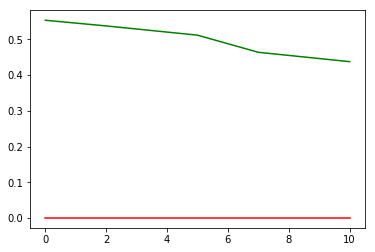

Working on... T
3.9810717055349722
Window: 0
[[  0 126]
 [  0 125]]
F1,score 0.6648936170212766
Accuracy: 0.49800796812749004
1.0
Window: 2
[[  0 132]
 [  0 119]]
F1,score 0.6432432432432432
Accuracy: 0.47410358565737054
6.309573444801943
Window: 5
[[  2 133]
 [  1 114]]
F1,score 0.6298342541436465
Accuracy: 0.464
251.18864315095797
Window: 7
[[ 31 109]
 [ 22  88]]
F1,score 0.5732899022801303
Accuracy: 0.476
63.0957344480193
Window: 10
[[137   9]
 [ 92  11]]
F1,score 0.17886178861788618
Accuracy: 0.5943775100401606
[0, 0, 0, 0, 0]
[0.49800796812749004, 0.47410358565737054, 0.464, 0.476, 0.5943775100401606]
accuracy
accuracy


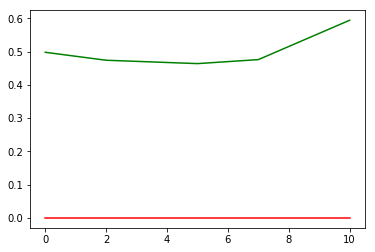

Working on... TM
15.848931924611133
Window: 0
[[54 69]
 [68 60]]
F1,score 0.4669260700389105
Accuracy: 0.4541832669322709
251.18864315095823
Window: 2
[[ 32 105]
 [ 26  88]]
F1,score 0.5732899022801302
Accuracy: 0.47808764940239046
0.003981071705534973
Window: 5
[[83 58]
 [36 73]]
F1,score 0.6083333333333333
Accuracy: 0.624
6.309573444801943
Window: 7
[[ 12 128]
 [  2 108]]
F1,score 0.6242774566473989
Accuracy: 0.48
1.0
Window: 10
[[ 16 133]
 [ 32  68]]
F1,score 0.451827242524917
Accuracy: 0.3373493975903614
[0, 0, 0, 0, 0]
[0.4541832669322709, 0.47808764940239046, 0.624, 0.48, 0.3373493975903614]
accuracy
accuracy


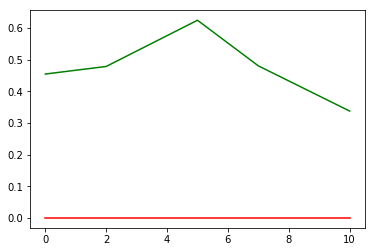

Working on... TOT
10000.0
Window: 0
[[ 36 107]
 [ 34  74]]
F1,score 0.5121107266435987
Accuracy: 0.43824701195219123
251.18864315095797
Window: 2
[[62 62]
 [60 67]]
F1,score 0.5234375
Accuracy: 0.5139442231075697
1000.0
Window: 5
[[46 73]
 [49 82]]
F1,score 0.5734265734265733
Accuracy: 0.512
10000.0
Window: 7
[[115   0]
 [134   1]]
F1,score 0.014705882352941178
Accuracy: 0.464
1.0
Window: 10
[[114   3]
 [109  23]]
F1,score 0.2911392405063291
Accuracy: 0.5502008032128514
[0, 0, 0, 0, 0]
[0.43824701195219123, 0.5139442231075697, 0.512, 0.464, 0.5502008032128514]
accuracy
accuracy


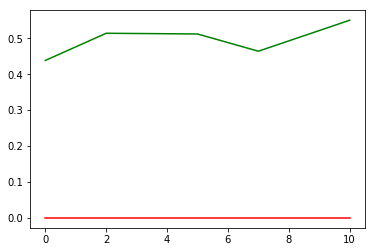

Working on... TSM
0.0001
Window: 0
[[  0 117]
 [  0 134]]
F1,score 0.6961038961038961
Accuracy: 0.5338645418326693
6.309573444801943
Window: 2
[[48 62]
 [67 74]]
F1,score 0.5342960288808665
Accuracy: 0.4860557768924303
6.309573444801943
Window: 5
[[65 46]
 [62 77]]
F1,score 0.5877862595419846
Accuracy: 0.568
0.15848931924611143
Window: 7
[[61 42]
 [73 74]]
F1,score 0.5627376425855514
Accuracy: 0.54
10000.0
Window: 10
[[ 65  25]
 [110  49]]
F1,score 0.42060085836909866
Accuracy: 0.4578313253012048
[0, 0, 0, 0, 0]
[0.5338645418326693, 0.4860557768924303, 0.568, 0.54, 0.4578313253012048]
accuracy
accuracy


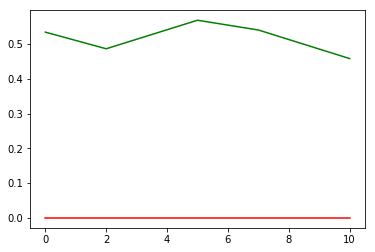

Working on... UL
251.18864315095823
Window: 0
[[93 28]
 [73 57]]
F1,score 0.5302325581395348
Accuracy: 0.5976095617529881
63.0957344480193
Window: 2
[[ 37  69]
 [ 36 109]]
F1,score 0.6749226006191951
Accuracy: 0.5816733067729084
1000.0
Window: 5
[[ 58  33]
 [102  57]]
F1,score 0.45783132530120485
Accuracy: 0.46
251.18864315095823
Window: 7
[[ 55  34]
 [105  56]]
F1,score 0.44621513944223107
Accuracy: 0.444
10000.0
Window: 10
[[ 55  34]
 [104  56]]
F1,score 0.44799999999999995
Accuracy: 0.4457831325301205
[0, 0, 0, 0, 0]
[0.5976095617529881, 0.5816733067729084, 0.46, 0.444, 0.4457831325301205]
accuracy
accuracy


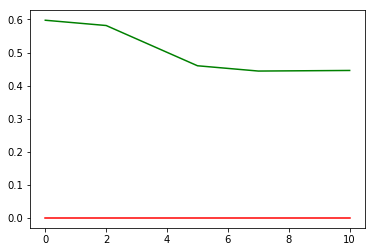

Working on... UN
0.003981071705534973
Window: 0
[[ 20  94]
 [ 23 114]]
F1,score 0.6608695652173914
Accuracy: 0.5338645418326693
251.18864315095797
Window: 2
[[24 83]
 [46 98]]
F1,score 0.6030769230769231
Accuracy: 0.4860557768924303
251.18864315095797
Window: 5
[[ 16  70]
 [ 29 135]]
F1,score 0.7317073170731707
Accuracy: 0.604
10000.0
Window: 7
[[39 41]
 [96 74]]
F1,score 0.519298245614035
Accuracy: 0.452
1000.0
Window: 10
[[ 53  37]
 [105  54]]
F1,score 0.43199999999999994
Accuracy: 0.42971887550200805
[0, 0, 0, 0, 0]
[0.5338645418326693, 0.4860557768924303, 0.604, 0.452, 0.42971887550200805]
accuracy
accuracy


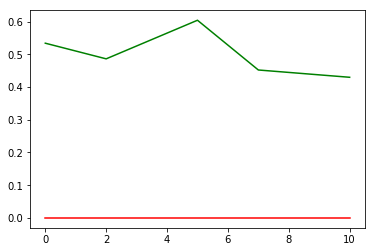

Working on... UNH
15.848931924611133
Window: 0
[[130   0]
 [121   0]]
F1,score 0.0
Accuracy: 0.5179282868525896


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


251.18864315095797
Window: 2
[[ 90  12]
 [126  23]]
F1,score 0.25
Accuracy: 0.450199203187251
15.848931924611133
Window: 5
[[ 34  66]
 [ 46 104]]
F1,score 0.65
Accuracy: 0.552
251.18864315095797
Window: 7
[[ 84   0]
 [166   0]]
F1,score 0.0
Accuracy: 0.336


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


251.18864315095823
Window: 10
[[ 63   7]
 [159  20]]
F1,score 0.19417475728155337
Accuracy: 0.3333333333333333
[0, 0, 0, 0, 0]
[0.5179282868525896, 0.450199203187251, 0.552, 0.336, 0.3333333333333333]
accuracy
accuracy


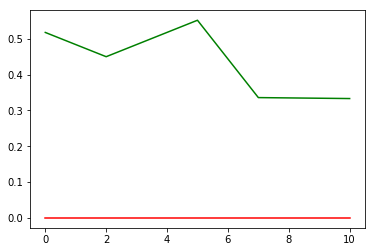

Working on... UPS
63.0957344480193
Window: 0
[[78 43]
 [70 60]]
F1,score 0.5150214592274678
Accuracy: 0.549800796812749
15.848931924611133
Window: 2
[[43 75]
 [53 80]]
F1,score 0.5555555555555555
Accuracy: 0.4900398406374502
1000.0
Window: 5
[[ 97  17]
 [107  29]]
F1,score 0.31868131868131866
Accuracy: 0.504
15.848931924611133
Window: 7
[[116   0]
 [133   1]]
F1,score 0.014814814814814815
Accuracy: 0.468
251.18864315095823
Window: 10
[[112   7]
 [ 95  35]]
F1,score 0.4069767441860465
Accuracy: 0.5903614457831325
[0, 0, 0, 0, 0]
[0.549800796812749, 0.4900398406374502, 0.504, 0.468, 0.5903614457831325]
accuracy
accuracy


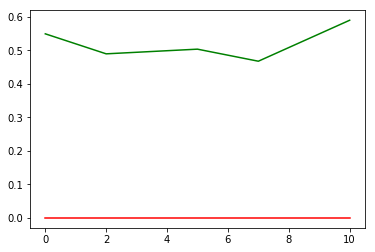

Working on... UTX
0.003981071705534973
Window: 0
[[112  21]
 [ 97  21]]
F1,score 0.2625
Accuracy: 0.5298804780876494
1000.0
Window: 2
[[104  20]
 [111  16]]
F1,score 0.19631901840490795
Accuracy: 0.47808764940239046
1.0
Window: 5
[[ 90  26]
 [107  27]]
F1,score 0.2887700534759358
Accuracy: 0.468
6.309573444801943
Window: 7
[[ 87  18]
 [120  25]]
F1,score 0.26595744680851063
Accuracy: 0.448
0.0001
Window: 10
[[ 91  14]
 [121  23]]
F1,score 0.25414364640883974
Accuracy: 0.4578313253012048
[0, 0, 0, 0, 0]
[0.5298804780876494, 0.47808764940239046, 0.468, 0.448, 0.4578313253012048]
accuracy
accuracy


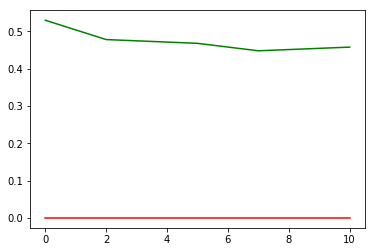

Working on... V
63.0957344480193
Window: 0
[[  8 104]
 [ 17 122]]
F1,score 0.6684931506849314
Accuracy: 0.5179282868525896
10000.0
Window: 2
[[ 79  16]
 [132  24]]
F1,score 0.2448979591836735
Accuracy: 0.4103585657370518
1000.0
Window: 5
[[44 46]
 [61 99]]
F1,score 0.6491803278688525
Accuracy: 0.572
63.0957344480193
Window: 7
[[ 47  41]
 [ 58 104]]
F1,score 0.6775244299674268
Accuracy: 0.604
251.18864315095797
Window: 10
[[57 25]
 [80 87]]
F1,score 0.6236559139784946
Accuracy: 0.5783132530120482
[0, 0, 0, 0, 0]
[0.5179282868525896, 0.4103585657370518, 0.572, 0.604, 0.5783132530120482]
accuracy
accuracy


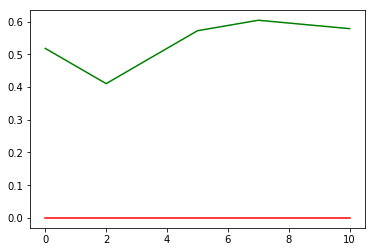

Working on... VZ
63.0957344480193
Window: 0
[[85 46]
 [82 38]]
F1,score 0.37254901960784315
Accuracy: 0.4900398406374502
10000.0
Window: 2
[[54 73]
 [47 77]]
F1,score 0.5620437956204379
Accuracy: 0.5219123505976095
3.9810717055349722
Window: 5
[[54 89]
 [34 73]]
F1,score 0.5427509293680297
Accuracy: 0.508
10000.0
Window: 7
[[71 67]
 [53 59]]
F1,score 0.4957983193277311
Accuracy: 0.52
1000.0
Window: 10
[[63 87]
 [32 67]]
F1,score 0.5296442687747035
Accuracy: 0.5220883534136547
[0, 0, 0, 0, 0]
[0.4900398406374502, 0.5219123505976095, 0.508, 0.52, 0.5220883534136547]
accuracy
accuracy


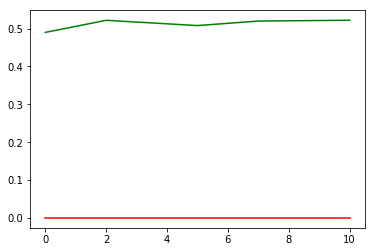

Working on... WFC
63.0957344480193
Window: 0
[[85 43]
 [75 48]]
F1,score 0.4485981308411215
Accuracy: 0.5298804780876494
3.9810717055349722
Window: 2
[[115  22]
 [ 93  21]]
F1,score 0.2675159235668789
Accuracy: 0.5418326693227091
1000.0
Window: 5
[[138   0]
 [112   0]]
F1,score 0.0
Accuracy: 0.552


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0001
Window: 7
[[118  20]
 [ 89  23]]
F1,score 0.2967741935483871
Accuracy: 0.564
3.9810717055349722
Window: 10
[[118  15]
 [ 91  25]]
F1,score 0.3205128205128205
Accuracy: 0.5742971887550201
[0, 0, 0, 0, 0]
[0.5298804780876494, 0.5418326693227091, 0.552, 0.564, 0.5742971887550201]
accuracy
accuracy


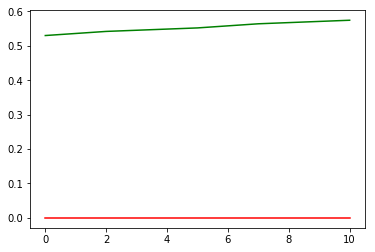

Working on... WMT
1000.0
Window: 0
[[39 74]
 [57 81]]
F1,score 0.552901023890785
Accuracy: 0.47808764940239046
63.0957344480193
Window: 2
[[45 70]
 [58 78]]
F1,score 0.5492957746478873
Accuracy: 0.4900398406374502
1.0
Window: 5
[[40 77]
 [59 74]]
F1,score 0.5211267605633804
Accuracy: 0.456
1000.0
Window: 7
[[34 75]
 [63 78]]
F1,score 0.5306122448979591
Accuracy: 0.448
1.0
Window: 10
[[34 69]
 [60 86]]
F1,score 0.5714285714285715
Accuracy: 0.4819277108433735
[0, 0, 0, 0, 0]
[0.47808764940239046, 0.4900398406374502, 0.456, 0.448, 0.4819277108433735]
accuracy
accuracy


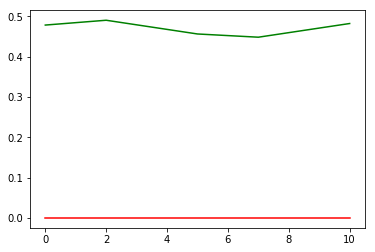

Working on... XOM
63.0957344480193
Window: 0
[[65 73]
 [42 71]]
F1,score 0.5525291828793774
Accuracy: 0.5418326693227091
1.0
Window: 2
[[ 24 113]
 [ 16  98]]
F1,score 0.603076923076923
Accuracy: 0.4860557768924303
63.0957344480193
Window: 5
[[133  16]
 [ 87  14]]
F1,score 0.2137404580152672
Accuracy: 0.588
3.9810717055349722
Window: 7
[[145   6]
 [ 91   8]]
F1,score 0.14159292035398233
Accuracy: 0.612
251.18864315095823
Window: 10
[[125  28]
 [ 65  31]]
F1,score 0.4000000000000001
Accuracy: 0.6265060240963856
[0, 0, 0, 0, 0]
[0.5418326693227091, 0.4860557768924303, 0.588, 0.612, 0.6265060240963856]
accuracy
accuracy


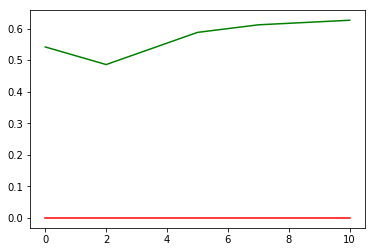

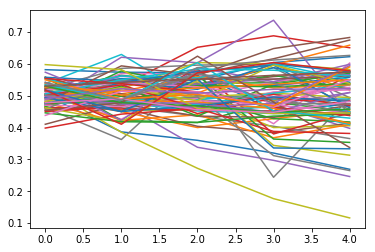

In [5]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',tickers[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[0,2,5,7,10]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['Close']-price.iloc[i+1]['Open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,6)),np.logspace(-4,4,6)))
        gspace=np.logspace(-5,2,6)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.8)
                x_train=x_tv[0:trainpoint]
                y_train=y_tv[0:trainpoint]
                x_val=x_tv[trainpoint:]
                y_val=y_tv[trainpoint:]

                rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                x_train,y_train=smote(x_train,y_train)
                rbf_svm.fit(x_train,y_train)

                x_val,y_val=smote(x_val,y_val)
                    
                    
                cvacc=rbf_svm.score(x_val,y_val)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(kernel='rbf',C=maxc,gamma=maxg)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [6]:
tempacc=accstocksresults

[0.50139271 0.49933138 0.50945623 0.4914044  0.48972039]


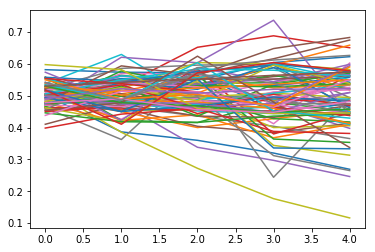

In [7]:
import operator
t=[0,0,0,0,0]
for i in range(0,len(tempacc)):
    #for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
     #   if(tempacc[i][k]<0.5):
      #     tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()